# Testing New Packages

- 05/19/22 
- Adding testing new skearn v1.1, yellowbrick, and dython

- Yellowbrick For Teachers: 
    - https://www.scikit-yb.org/en/latest/teaching.html 
- Dython:
    - http://shakedzy.xyz/dython/getting_started/examples/

# Linear Regression with Statsmodels for Movie Revenue - Part 2

## Activity: Create a Linear Regression Model with Statsmodels for Revenue

- Last Class:
    - We started working with JUST the data data from the TMDB API for years 2000-2021. 
    - We prepared the data for modeling
        - Some feature engineering
        - Our usual Preprocessing
        - New steps for statsmodels!
    - We fit a statsmodels linear regression.
    
    
- Today:
    - We Will inspect the model summary.
    - We will create the visualizations to check assumptions about the residuals.
    - We will iterate upon our model until we meet the 4 assumptions as best we can.
    - We will discuss tactics for dealing with violations of the assumptions. 
    - We will use our coefficients to make stakeholder recommendations (if theres time ü§û).

> **[üïπ Click here to jump to Part 2!](#üïπ-Part-2:-Checking-Model-Assumptions)**

# üì∫ Previously, on...

## Loading the Data

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
## fixing random for lesson generation
np.random.seed(321)

##import statsmodels correctly
import statsmodels.api as sm

In [2]:
pd.set_option('display.max_columns',100)

### üìö Finding & Loading Batches of Files with `glob`

In [3]:
## Checking what data we already in our Data folder using os.listdir
import os
FOLDER = '../Data/'
file_list = sorted(os.listdir(FOLDER))
file_list

['.ipynb_checkpoints',
 '3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv',
 'James Dataset links.csv',
 'combined_tmdb_data.csv.gz',
 'drug_use_renamed_converted.csv.gz',
 'insurance.csv',
 'iowa-prisoner-recidivism_data-iowa-gov-api.csv',
 'iowa_recidivism_renamed_2021.csv',
 'student-mat.csv',
 'student_data.csv']

In [4]:
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df

imdb_id  adult                     backdrop_path  \
0      tt0312305    0.0                               NaN   
1      tt0326965    0.0  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg   
2      tt0331312    0.0                               NaN   
3      tt0393049    0.0  /gc9FN5zohhzCt05RkejQIIPLtBl.jpg   
4      tt0398286    0.0  /cWczNud8Y8i8ab0Z4bxos4myWYO.jpg   
...          ...    ...                               ...   
60125  tt7661128    0.0                               NaN   
60126  tt7786614    0.0                               NaN   
60127  tt8170758    0.0                               NaN   
60128  tt9330112    0.0                               NaN   
60129  tt9556198    0.0                               NaN   

                                   belongs_to_collection       budget  \
0                                                    NaN          0.0   
1                                                    NaN          0.0   
2                                                    NaN          0.0   
3                                                    NaN     300000.0   
4                                                    NaN  260000000.0   
...                                                  ...          ...   
60125                                                NaN          0.0   
60126                                                NaN          0.0   
60127                                                NaN          0.0   
60128                                                NaN          0.0   
60129  {'id': 866148, 'name': 'Deep Sea Monster Raiga...          0.0   

                                                  genres  \
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
2                                                     []   
3      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
4      [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
...                                                  ...   
60125                   [{'id': 53, 'name': 'Thriller'}]   
60126                                                 []   
60127                                                 []   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
60129  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   

                                           homepage        id  \
0                        http://www.qqthemovie.com/   23738.0   
1                          http://www.inmysleep.com   40048.0   
2                                               NaN  214026.0   
3                                               NaN  324352.0   
4      http://disney.go.com/disneypictures/tangled/   38757.0   
...                                             ...       ...   
60125                                           NaN  595306.0   
60126                                           NaN  616643.0   
60127                                           NaN  513464.0   
60128                                           NaN  111622.0   
60129                                           NaN  488412.0   

      original_language                          original_title  \
0                    en  Quantum Quest: A Cassini Space Odyssey   
1                    en                             In My Sleep   
2                    en                      This Wretched Life   
3                    en                        Anderson's Cross   
4                    en                                 Tangled   
...                 ...                                     ...   
60125                en                          Cold by Nature   
60126                en                                 Ci qing   
60127                en         The Swell Season: One Step Away   
60128                ta                    ‡Æ®‡Æø‡Æ©‡Øà‡Æ§‡Øç‡Æ§‡Ææ‡Æ≤‡Øá ‡Æá‡Æ©‡Æø‡Æï‡Øç‡Æï‡ØÅ‡ÆÆ‡Øç   
60129                ja                                   Ê∑±Êµ∑Áç£Èõ∑Áâô   

                                            

## Preprocessing

In [5]:
## Columns to exclude
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', 'status',
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)
df

imdb_id  adult                              belongs_to_collection  \
0      tt0312305    0.0                                                NaN   
1      tt0326965    0.0                                                NaN   
2      tt0331312    0.0                                                NaN   
3      tt0393049    0.0                                                NaN   
4      tt0398286    0.0                                                NaN   
...          ...    ...                                                ...   
60125  tt7661128    0.0                                                NaN   
60126  tt7786614    0.0                                                NaN   
60127  tt8170758    0.0                                                NaN   
60128  tt9330112    0.0                                                NaN   
60129  tt9556198    0.0  {'id': 866148, 'name': 'Deep Sea Monster Raiga...   

            budget                                             genres  \
0              0.0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1              0.0  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
2              0.0                                                 []   
3         300000.0  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
4      260000000.0  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
...            ...                                                ...   
60125          0.0                   [{'id': 53, 'name': 'Thriller'}]   
60126          0.0                                                 []   
60127          0.0                                                 []   
60128          0.0  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...   
60129          0.0  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...   

       popularity                               production_companies  \
0           2.769                                                 []   
1           6.120                                                 []   
2           0.600                                                 []   
3           2.418  [{'id': 46102, 'logo_path': None, 'name': 'Ill...   
4         119.168  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
...           ...                                                ...   
60125       0.600  [{'id': 117146, 'logo_path': None, 'name': 'JE...   
60126       0.600                                                 []   
60127       0.600                                                 []   
60128       1.201                                                 []   
60129       0.840  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   

      release_date      revenue  runtime  \
0       2012-12-02          0.0     45.0   
1       2010-04-23          0.0     90.0   
2       2010-01-01          0.0      0.0   
3       2010-05-20          0.0     98.0   
4       2010-11-24  592461732.0    100.0   
...            ...          ...      ...   
60125   2009-09-01     250000.0     77.0   
60126   2009-01-01          0.0    100.0   
60127   2009-10-27          0.0     61.0   
60128   2009-09-04          0.0    145.0   
60129   2009-08-15          0.0     80.0   

                                        title  vote_average  vote_count  \
0      Quantum Quest: A Cassini Space Odyssey           8.4         7.0   
1                                 In My Sleep           5.5        31.0   
2                          This Wretched Life           5.0         1.0   
3                            Anderson's Cross           4.0         5.0   
4                                     Tangled           7.6      9364.0   
...                                       ...           ...         ...   
60125                          Cold by Nature           0.0         0.0   
60126                                  Tattoo           5.0         1.0   
60127         The Swell Season: One Step Away           0.0         0.0   
60128                      Ninaithale Inikkum      

### Feature Engineering


- Collection: convert to boolean
- Genres: get just name and OHE
- Cleaning Certification
- Converting release date to year, month, and day.

#### belongs to collection

In [6]:
# there are 3,700+ movies that belong to collections
df['belongs_to_collection'].notna().sum()

3738

In [7]:
## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()
df['belongs_to_collection'].value_counts()

False    56392
True      3738
Name: belongs_to_collection, dtype: int64

#### genre

In [8]:
## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [9]:
## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

imdb_id  adult  belongs_to_collection  budget  \
0      tt0312305    0.0                  False     0.0   
0      tt0312305    0.0                  False     0.0   
0      tt0312305    0.0                  False     0.0   
1      tt0326965    0.0                  False     0.0   
1      tt0326965    0.0                  False     0.0   
...          ...    ...                    ...     ...   
60128  tt9330112    0.0                  False     0.0   
60128  tt9330112    0.0                  False     0.0   
60128  tt9330112    0.0                  False     0.0   
60129  tt9556198    0.0                   True     0.0   
60129  tt9556198    0.0                   True     0.0   

                                                  genres  popularity  \
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       2.769   
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       2.769   
0      [{'id': 10751, 'name': 'Family'}, {'id': 16, '...       2.769   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...       6.120   
1      [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...       6.120   
...                                                  ...         ...   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...       1.201   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...       1.201   
60128  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...       1.201   
60129  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...       0.840   
60129  [{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...       0.840   

                                    production_companies release_date  \
0                                                     []   2012-12-02   
0                                                     []   2012-12-02   
0                                                     []   2012-12-02   
1                                                     []   2010-04-23   
1                                                     []   2010-04-23   
...                                                  ...          ...   
60128                                                 []   2009-09-04   
60128                                                 []   2009-09-04   
60128                                                 []   2009-09-04   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   2009-08-15   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   2009-08-15   

       revenue  runtime                                   title  vote_average  \
0          0.0     45.0  Quantum Quest: A Cassini Space Odyssey           8.4   
0          0.0     45.0  Quantum Quest: A Cassini Space Odyssey           8.4   
0          0.0     45.0  Quantum Quest: A Cassini Space Odyssey           8.4   
1          0.0     90.0                             In My Sleep           5.5   
1          0.0     90.0                             In My Sleep           5.5   
...        ...      ...                                     ...           ...   
60128      0.0    145.0                      Ninaithale Inikkum           4.0   
60128      0.0    145.0                      Ninaithale Inikkum           4.0   
60128      0.0    145.0                      Ninaithale Inikkum           4.0   
60129      0.0     80.0                  Deep Sea Monster Raiga           7.7   
60129      0.0     80.0                  Deep Sea Monster Raiga           7.7   

       vote_count certification      genres_list  
0             7.0           NaN           Family  
0             7.0           NaN        Animation  
0             7.0           NaN  Science Fiction  
1            31.0         PG-13         Thriller  
1            31.0         PG-13          Mystery  
...           ...           ...              ...  
60128         1.0           NaN            Drama  
60128         1.0           NaN         Thriller  
60128         1.0           NaN          Mystery  
60129         3.0           NaN           Action  
60129         3.0           NaN     

In [10]:
## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    

## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305    0.0                  False          0.0       2.769   
1      tt0326965    0.0                  False          0.0       6.120   
2      tt0331312    0.0                  False          0.0       0.600   
3      tt0393049    0.0                  False     300000.0       2.418   
4      tt0398286    0.0                  False  260000000.0     119.168   
...          ...    ...                    ...          ...         ...   
60125  tt7661128    0.0                  False          0.0       0.600   
60126  tt7786614    0.0                  False          0.0       0.600   
60127  tt8170758    0.0                  False          0.0       0.600   
60128  tt9330112    0.0                  False          0.0       1.201   
60129  tt9556198    0.0                   True          0.0       0.840   

                                    production_companies release_date  \
0                                                     []   2012-12-02   
1                                                     []   2010-04-23   
2                                                     []   2010-01-01   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...   2010-05-20   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   2010-11-24   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...   2009-09-01   
60126                                                 []   2009-01-01   
60127                                                 []   2009-10-27   
60128                                                 []   2009-09-04   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...   2009-08-15   

           revenue  runtime                                   title  \
0              0.0     45.0  Quantum Quest: A Cassini Space Odyssey   
1              0.0     90.0                             In My Sleep   
2              0.0      0.0                      This Wretched Life   
3              0.0     98.0                        Anderson's Cross   
4      592461732.0    100.0                                 Tangled   
...            ...      ...                                     ...   
60125     250000.0     77.0                          Cold by Nature   
60126          0.0    100.0                                  Tattoo   
60127          0.0     61.0         The Swell Season: One Step Away   
60128          0.0    145.0                      Ninaithale Inikkum   
60129          0.0     80.0                  Deep Sea Monster Raiga   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
0               8.4         7.0           NaN          True             True   
1               5.5        31.0         PG-13         False            False   
2               5.0         1.0           NaN         False            False   
3               4.0         5.0           NaN         False            False   
4               7.6      9364.0            PG          True             True   
...             ...         ...           ...           ...              ...   
60125           0.0         0.0         PG-13         False            False   
60126           5.0         1.0           NaN         False            False   
60127           0.0         0.0            NR         False            False   
60128           4.0         1.0           NaN         False            False   
60129           7.7         3.0           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False         

#### certification

In [11]:
## Checking Certification values
# df['certification'].value_counts(dropna=False)

# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      45507
R         6098
NR        3270
PG-13     3225
PG        1432
G          442
NC-17      156
Name: certification, dtype: int64

#### Converting year to sep features

In [12]:
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)
## drop original feature
df = df.drop(columns=['release_date'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305    0.0                  False          0.0       2.769   
1      tt0326965    0.0                  False          0.0       6.120   
2      tt0331312    0.0                  False          0.0       0.600   
3      tt0393049    0.0                  False     300000.0       2.418   
4      tt0398286    0.0                  False  260000000.0     119.168   
...          ...    ...                    ...          ...         ...   
60125  tt7661128    0.0                  False          0.0       0.600   
60126  tt7786614    0.0                  False          0.0       0.600   
60127  tt8170758    0.0                  False          0.0       0.600   
60128  tt9330112    0.0                  False          0.0       1.201   
60129  tt9556198    0.0                   True          0.0       0.840   

                                    production_companies      revenue  \
0                                                     []          0.0   
1                                                     []          0.0   
2                                                     []          0.0   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...          0.0   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...  592461732.0   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...     250000.0   
60126                                                 []          0.0   
60127                                                 []          0.0   
60128                                                 []          0.0   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...          0.0   

       runtime                                   title  vote_average  \
0         45.0  Quantum Quest: A Cassini Space Odyssey           8.4   
1         90.0                             In My Sleep           5.5   
2          0.0                      This Wretched Life           5.0   
3         98.0                        Anderson's Cross           4.0   
4        100.0                                 Tangled           7.6   
...        ...                                     ...           ...   
60125     77.0                          Cold by Nature           0.0   
60126    100.0                                  Tattoo           5.0   
60127     61.0         The Swell Season: One Step Away           0.0   
60128    145.0                      Ninaithale Inikkum           4.0   
60129     80.0                  Deep Sea Monster Raiga           7.7   

       vote_count certification  Genre_Family  Genre_Animation  \
0             7.0           NaN          True             True   
1            31.0         PG-13         False            False   
2             1.0           NaN         False            False   
3             5.0           NaN         False            False   
4          9364.0            PG          True             True   
...           ...           ...           ...              ...   
60125         0.0         PG-13         False            False   
60126         1.0           NaN         False            False   
60127         0.0            NR         False            False   
60128         1.0           NaN         False            False   
60129         3.0           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False           False          False        False   
...                      ...             ...            ...          ...   
60125                  False            T

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60130 entries, 0 to 60129
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                60130 non-null  object 
 1   adult                  60130 non-null  float64
 2   belongs_to_collection  60130 non-null  bool   
 3   budget                 60130 non-null  float64
 4   popularity             60130 non-null  float64
 5   production_companies   60130 non-null  object 
 6   revenue                60130 non-null  float64
 7   runtime                59298 non-null  float64
 8   title                  60130 non-null  object 
 9   vote_average           60130 non-null  float64
 10  vote_count             60130 non-null  float64
 11  certification          14623 non-null  object 
 12  Genre_Family           60130 non-null  bool   
 13  Genre_Animation        60130 non-null  bool   
 14  Genre_Science Fiction  60130 non-null  bool   
 15  Ge

In [14]:
# df= df.drop(columns='Genre_nan')

## Train Test Split

In [15]:
drop_for_model = ['title','imdb_id','production_companies']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection       budget  popularity      revenue  \
0        0.0                  False          0.0       2.769          0.0   
1        0.0                  False          0.0       6.120          0.0   
2        0.0                  False          0.0       0.600          0.0   
3        0.0                  False     300000.0       2.418          0.0   
4        0.0                  False  260000000.0     119.168  592461732.0   
...      ...                    ...          ...         ...          ...   
60125    0.0                  False          0.0       0.600     250000.0   
60126    0.0                  False          0.0       0.600          0.0   
60127    0.0                  False          0.0       0.600          0.0   
60128    0.0                  False          0.0       1.201          0.0   
60129    0.0                   True          0.0       0.840          0.0   

       runtime  vote_average  vote_count certification  Genre_Family  \
0         45.0           8.4         7.0           NaN          True   
1         90.0           5.5        31.0         PG-13         False   
2          0.0           5.0         1.0           NaN         False   
3         98.0           4.0         5.0           NaN         False   
4        100.0           7.6      9364.0            PG          True   
...        ...           ...         ...           ...           ...   
60125     77.0           0.0         0.0         PG-13         False   
60126    100.0           5.0         1.0           NaN         False   
60127     61.0           0.0         0.0            NR         False   
60128    145.0           4.0         1.0           NaN         False   
60129     80.0           7.7         3.0           NaN         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
0                 True                   True           False          False   
1                False                  False            True           True   
2                False                  False           False          False   
3                False                  False           False          False   
4                 True                  False           False          False   
...                ...                    ...             ...            ...   
60125            False                  False            True          False   
60126            False                  False           False          False   
60127            False                  False           False          False   
60128            False                  False            True           True   
60129            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
0            False          False         False      False        False   
1             True          False         False      False        False   
2            False          False         False      False        False   
3             True           True          True      False        False   
4            False          False         False      False        False   
...            ...            ...           ...        ...          ...   
60125        False          False         False      False        False   
60126        False          False         False      False        False   
60127        False          False         False      False        False   
60128         True          False         False      False        False   
60129        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
0             False            False         False          False   
1             False            False         False          False   
2             False            False         False          False   
3             False            False         False          False   
4         

In [16]:
## Make x and y variables
y = df['revenue'].copy()
X = df.drop(columns=['revenue']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=321)
X_train.head()

adult  belongs_to_collection    budget  popularity  runtime  \
9538     0.0                  False       0.0       1.113     80.0   
16553    0.0                  False       0.0       1.875     92.0   
34106    0.0                  False       0.0       1.499    101.0   
3804     0.0                  False       0.0       1.506    100.0   
37747    0.0                  False  300000.0       0.600    138.0   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
9538            5.3         5.0           NaN          True            False   
16553           6.0         2.0           NaN         False            False   
34106           2.0         1.0             R         False            False   
3804            7.7         3.0            PG         False            False   
37747           5.0         2.0           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
9538                   False           False          False         True   
16553                  False           False          False         True   
34106                  False           False          False        False   
3804                    True           False          False        False   
37747                  False           False          False        False   

       Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  Genre_Action  \
9538           False          True      False        False         False   
16553          False         False      False        False         False   
34106          False          True      False        False         False   
3804           False          True      False        False         False   
37747          False         False      False        False         False   

       Genre_Adventure  Genre_Horror  Genre_Fantasy  Genre_History  \
9538             False         False          False          False   
16553            False         False          False          False   
34106            False         False          False          False   
3804              True         False          False          False   
37747            False         False          False          False   

       Genre_Western  Genre_Music  Genre_Documentary  Genre_TV Movie    year  \
9538           False        False              False           False  2013.0   
16553          False        False              False           False  2015.0   
34106          False        False              False           False  2020.0   
3804           False        False              False           False  2011.0   
37747          False        False              False           False  2020.0   

       month   day  
9538    10.0   1.0  
16553    4.0  15.0  
34106   11.0   4.0  
3804     9.0  24.0  
37747    9.0  18.0

In [17]:
X_train.isna().sum()

adult                        0
belongs_to_collection        0
budget                       0
popularity                   0
runtime                    638
vote_average                 0
vote_count                   0
certification            34082
Genre_Family                 0
Genre_Animation              0
Genre_Science Fiction        0
Genre_Thriller               0
Genre_Mystery                0
Genre_Drama                  0
Genre_Romance                0
Genre_Comedy                 0
Genre_War                    0
Genre_Crime                  0
Genre_Action                 0
Genre_Adventure              0
Genre_Horror                 0
Genre_Fantasy                0
Genre_History                0
Genre_Western                0
Genre_Music                  0
Genre_Documentary            0
Genre_TV Movie               0
year                       792
month                      792
day                        792
dtype: int64

In [18]:
## make cat selector and using it to save list of column names
cat_select = make_column_selector(dtype_include='object')
cat_cols = cat_select(X_train)
cat_cols

['certification']

In [19]:
## make num selector and using it to save list of column names
num_select = make_column_selector(dtype_include='number')
num_cols = num_select(X_train)
num_cols

['adult',
 'budget',
 'popularity',
 'runtime',
 'vote_average',
 'vote_count',
 'year',
 'month',
 'day']

In [20]:
## select manually OHE cols for later
bool_select = make_column_selector(dtype_include='bool')
already_ohe_cols = bool_select(X_train)
already_ohe_cols

['belongs_to_collection',
 'Genre_Family',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Thriller',
 'Genre_Mystery',
 'Genre_Drama',
 'Genre_Romance',
 'Genre_Comedy',
 'Genre_War',
 'Genre_Crime',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Horror',
 'Genre_Fantasy',
 'Genre_History',
 'Genre_Western',
 'Genre_Music',
 'Genre_Documentary',
 'Genre_TV Movie']

In [21]:
## convert manual ohe to int
X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)
X_train

adult  belongs_to_collection    budget  popularity  runtime  \
9538     0.0                      0       0.0       1.113     80.0   
16553    0.0                      0       0.0       1.875     92.0   
34106    0.0                      0       0.0       1.499    101.0   
3804     0.0                      0       0.0       1.506    100.0   
37747    0.0                      0  300000.0       0.600    138.0   
...      ...                    ...       ...         ...      ...   
5929     0.0                      0       0.0       1.400     95.0   
43807    0.0                      0  100000.0       1.660     82.0   
4220     0.0                      0       0.0       0.843     92.0   
6682     0.0                      1       0.0       3.976    113.0   
31732    0.0                      0       0.0       3.059    159.0   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
9538            5.3         5.0           NaN             1                0   
16553           6.0         2.0           NaN             0                0   
34106           2.0         1.0             R             0                0   
3804            7.7         3.0            PG             0                0   
37747           5.0         2.0           NaN             0                0   
...             ...         ...           ...           ...              ...   
5929            5.0         4.0           NaN             0                0   
43807           4.8         4.0           NaN             0                0   
4220            0.0         0.0           NaN             0                0   
6682            6.0        18.0            NR             0                0   
31732           6.5         8.0           NaN             0                0   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
9538                       0               0              0            1   
16553                      0               0              0            1   
34106                      0               0              0            0   
3804                       1               0              0            0   
37747                      0               0              0            0   
...                      ...             ...            ...          ...   
5929                       0               1              1            0   
43807                      0               0              0            0   
4220                       0               0              0            0   
6682                       0               0              0            0   
31732                      0               0              0            1   

       Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  Genre_Action  \
9538               0             1          0            0             0   
16553              0             0          0            0             0   
34106              0             1          0            0             0   
3804               0             1          0            0             0   
37747              0             0          0            0             0   
...              ...           ...        ...          ...           ...   
5929               0             0          0            1             0   
43807              0             1          0            0             0   
4220               0             0          0            0             0   
6682               1             1          0            0             0   
31732              0             0          0            0             0   

       Genre_Adventure  Genre_Horror  Genre_Fantasy  Genre_History  \
9538                 0             0              0              0   
16553                0             0              0              0   
34106                0             0              0              0   
3804                 1             0              0              0   
37747                0       

In [22]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((num_pipe, num_cols),
                                       (cat_pipe,cat_cols),remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', 'vote_count', 'year', 'month',
                                  'day']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification'])])

In [23]:
## fit the col transformer
preprocessor.fit(X_train)

## Finding the categorical pipeline in our col transformer.
preprocessor.named_transformers_['pipeline-2']

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [24]:
## B) Using list-slicing to find the encoder 
cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


## Create the empty list
final_features = [*num_cols,*cat_features,*already_ohe_cols]
len(final_features)

36

In [25]:
preprocessor.transform(X_train).shape

(45097, 36)

In [26]:
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=final_features, index=X_train.index)
X_train_tf.head()


adult    budget  popularity  runtime  vote_average  vote_count    year  \
9538     0.0       0.0       1.113     80.0           5.3         5.0  2013.0   
16553    0.0       0.0       1.875     92.0           6.0         2.0  2015.0   
34106    0.0       0.0       1.499    101.0           2.0         1.0  2020.0   
3804     0.0       0.0       1.506    100.0           7.7         3.0  2011.0   
37747    0.0  300000.0       0.600    138.0           5.0         2.0  2020.0   

       month   day  certification_G  certification_MISSING  \
9538    10.0   1.0              0.0                    1.0   
16553    4.0  15.0              0.0                    1.0   
34106   11.0   4.0              0.0                    0.0   
3804     9.0  24.0              0.0                    0.0   
37747    9.0  18.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
9538                   0.0               0.0               0.0   
16553                  0.0               0.0               0.0   
34106                  0.0               0.0               0.0   
3804                   0.0               0.0               1.0   
37747                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
9538                   0.0              0.0                    0.0   
16553                  0.0              0.0                    0.0   
34106                  0.0              1.0                    0.0   
3804                   0.0              0.0                    0.0   
37747                  0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
9538            1.0              0.0                    0.0             0.0   
16553           0.0              0.0                    0.0             0.0   
34106           0.0              0.0                    0.0             0.0   
3804            0.0              0.0                    1.0             0.0   
37747           0.0              0.0                    0.0             0.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
9538             0.0          1.0            0.0           1.0        0.0   
16553            0.0          1.0            0.0           0.0        0.0   
34106            0.0          0.0            0.0           1.0        0.0   
3804             0.0          0.0            0.0           1.0        0.0   
37747            0.0          0.0            0.0           0.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
9538           0.0           0.0              0.0           0.0   
16553          0.0           0.0              0.0           0.0   
34106          0.0           0.0              0.0           0.0   
3804           0.0           0.0              1.0           0.0   
37747          0.0           0.0              0.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
9538             0.0            0.0            0.0          0.0   
16553            0.0            0.0            0.0          0.0   
34106            0.0            0.0            0.0          0.0   
3804             0.0            0.0            0.0          0.0   
37747            0.0            0.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  
9538                 0.0             0.0  
16553                0.0             0.0  
34106                0.0             0.0  
3804                 0.0             0.0  
37747                0.0             0.0

In [27]:
X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                         columns=final_features, index=X_test.index)
X_test_tf.head()

adult      budget  popularity  runtime  vote_average  vote_count  \
19252    0.0      1000.0       1.422     70.0           0.0         0.0   
40663    0.0         0.0       3.180     99.0           7.0         4.0   
35595    0.0         0.0       3.285      0.0           6.4        16.0   
979      0.0         0.0       1.052     90.0           5.0         4.0   
44055    0.0  26000000.0      16.946    126.0           7.4      1011.0   

         year  month   day  certification_G  certification_MISSING  \
19252  2015.0   12.0  17.0              0.0                    1.0   
40663  2021.0   11.0  26.0              0.0                    1.0   
35595  2019.0    8.0  15.0              0.0                    1.0   
979    2010.0    1.0   1.0              1.0                    0.0   
44055  2021.0    2.0  12.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
19252                  0.0               0.0               0.0   
40663                  0.0               0.0               0.0   
35595                  0.0               0.0               0.0   
979                    0.0               0.0               0.0   
44055                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
19252                  0.0              0.0                    0.0   
40663                  0.0              0.0                    0.0   
35595                  0.0              0.0                    0.0   
979                    0.0              0.0                    0.0   
44055                  0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
19252           0.0              0.0                    0.0             0.0   
40663           0.0              0.0                    0.0             1.0   
35595           0.0              0.0                    0.0             0.0   
979             1.0              0.0                    0.0             0.0   
44055           0.0              0.0                    0.0             0.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
19252            0.0          0.0            0.0           0.0        0.0   
40663            0.0          0.0            0.0           0.0        0.0   
35595            0.0          0.0            0.0           1.0        0.0   
979              0.0          0.0            0.0           0.0        0.0   
44055            0.0          1.0            0.0           0.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
19252          0.0           0.0              0.0           1.0   
40663          0.0           0.0              0.0           0.0   
35595          1.0           0.0              0.0           0.0   
979            0.0           0.0              0.0           0.0   
44055          0.0           0.0              0.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
19252            0.0            0.0            0.0          0.0   
40663            0.0            0.0            0.0          0.0   
35595            0.0            0.0            0.0          0.0   
979              0.0            0.0            0.0          0.0   
44055            0.0            1.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  
19252                0.0             0.0  
40663                0.0             0.0  
35595                0.0             0.0  
979                  0.0             0.0  
44055                0.0             0.0

# 05/19/22 Using sklearn v1.1 fixed get_feature_names_out()

In [28]:
## make pipelines
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                        )

preprocessor = make_column_transformer((num_pipe, num_cols),
                                       (cat_pipe,cat_cols),
                                       verbose_feature_names_out=False, ## SIMPLIFIES NAMES
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 ['adult', 'budget', 'popularity', 'runtime',
                                  'vote_average', 'vote_count', 'year', 'month',
                                  'day']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['certification'])],
                  verbose_feature_names_out=False)

In [29]:
## fit the col transformer
preprocessor.fit(X_train)
X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                          columns=preprocessor.get_feature_names_out(),
                          index=X_train.index)
X_test_tf = pd.DataFrame( preprocessor.transform(X_test), 
                          columns=preprocessor.get_feature_names_out(),
                          index=X_test.index)
X_train_tf.head()

adult    budget  popularity  runtime  vote_average  vote_count    year  \
9538     0.0       0.0       1.113     80.0           5.3         5.0  2013.0   
16553    0.0       0.0       1.875     92.0           6.0         2.0  2015.0   
34106    0.0       0.0       1.499    101.0           2.0         1.0  2020.0   
3804     0.0       0.0       1.506    100.0           7.7         3.0  2011.0   
37747    0.0  300000.0       0.600    138.0           5.0         2.0  2020.0   

       month   day  certification_G  certification_MISSING  \
9538    10.0   1.0              0.0                    1.0   
16553    4.0  15.0              0.0                    1.0   
34106   11.0   4.0              0.0                    0.0   
3804     9.0  24.0              0.0                    0.0   
37747    9.0  18.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
9538                   0.0               0.0               0.0   
16553                  0.0               0.0               0.0   
34106                  0.0               0.0               0.0   
3804                   0.0               0.0               1.0   
37747                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
9538                   0.0              0.0                    0.0   
16553                  0.0              0.0                    0.0   
34106                  0.0              1.0                    0.0   
3804                   0.0              0.0                    0.0   
37747                  0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
9538            1.0              0.0                    0.0             0.0   
16553           0.0              0.0                    0.0             0.0   
34106           0.0              0.0                    0.0             0.0   
3804            0.0              0.0                    1.0             0.0   
37747           0.0              0.0                    0.0             0.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
9538             0.0          1.0            0.0           1.0        0.0   
16553            0.0          1.0            0.0           0.0        0.0   
34106            0.0          0.0            0.0           1.0        0.0   
3804             0.0          0.0            0.0           1.0        0.0   
37747            0.0          0.0            0.0           0.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
9538           0.0           0.0              0.0           0.0   
16553          0.0           0.0              0.0           0.0   
34106          0.0           0.0              0.0           0.0   
3804           0.0           0.0              1.0           0.0   
37747          0.0           0.0              0.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
9538             0.0            0.0            0.0          0.0   
16553            0.0            0.0            0.0          0.0   
34106            0.0            0.0            0.0          0.0   
3804             0.0            0.0            0.0          0.0   
37747            0.0            0.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  
9538                 0.0             0.0  
16553                0.0             0.0  
34106                0.0             0.0  
3804                 0.0             0.0  
37747                0.0             0.0

## Yellowbrick

In [30]:
# import warnings 
# warnings.filterwarnings('ignore')

In [31]:
# import yellowbrick as yb
# from yellowbrick.features import Rank2D
# # g = yb.anscombe();
# # plt.show()

In [32]:
# # from yellowbrick.datasets import load_credit
# from yellowbrick.features import Rank2D

# # # Load the credit dataset
# # X, y = load_credit()

# # Instantiate the visualizer with the covariance ranking algorithm
# visualizer = Rank2D(algorithm='covariance')

# visualizer.fit(X, y)           # Fit the data to the visualizer
# visualizer.transform(X)        # Transform the data
# visualizer.show()              # Finalize and render the figure

In [33]:
X

adult  belongs_to_collection       budget  popularity  runtime  \
0        0.0                  False          0.0       2.769     45.0   
1        0.0                  False          0.0       6.120     90.0   
2        0.0                  False          0.0       0.600      0.0   
3        0.0                  False     300000.0       2.418     98.0   
4        0.0                  False  260000000.0     119.168    100.0   
...      ...                    ...          ...         ...      ...   
60125    0.0                  False          0.0       0.600     77.0   
60126    0.0                  False          0.0       0.600    100.0   
60127    0.0                  False          0.0       0.600     61.0   
60128    0.0                  False          0.0       1.201    145.0   
60129    0.0                   True          0.0       0.840     80.0   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
0               8.4         7.0           NaN          True             True   
1               5.5        31.0         PG-13         False            False   
2               5.0         1.0           NaN         False            False   
3               4.0         5.0           NaN         False            False   
4               7.6      9364.0            PG          True             True   
...             ...         ...           ...           ...              ...   
60125           0.0         0.0         PG-13         False            False   
60126           5.0         1.0           NaN         False            False   
60127           0.0         0.0            NR         False            False   
60128           4.0         1.0           NaN         False            False   
60129           7.7         3.0           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False           False          False        False   
...                      ...             ...            ...          ...   
60125                  False            True          False        False   
60126                  False           False          False        False   
60127                  False           False          False        False   
60128                  False            True           True         True   
60129                  False           False          False        False   

       Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  Genre_Action  \
0              False         False      False        False         False   
1              False         False      False        False         False   
2              False         False      False        False         False   
3               True          True      False        False         False   
4              False         False      False        False         False   
...              ...           ...        ...          ...           ...   
60125          False         False      False        False         False   
60126          False         False      False        False         False   
60127          False         False      False        False         False   
60128          False         False      False        False         False   
60129          False         False      False        False          True   

       Genre_Adventure  Genre_Horror  Genre_Fantasy  Genre_History  \
0                False         False          False          False   
1                False         False          False          False   
2                False         False          False          False   
3                False         False          False          Fa

In [34]:
X_train_tf

adult    budget  popularity  runtime  vote_average  vote_count    year  \
9538     0.0       0.0       1.113     80.0           5.3         5.0  2013.0   
16553    0.0       0.0       1.875     92.0           6.0         2.0  2015.0   
34106    0.0       0.0       1.499    101.0           2.0         1.0  2020.0   
3804     0.0       0.0       1.506    100.0           7.7         3.0  2011.0   
37747    0.0  300000.0       0.600    138.0           5.0         2.0  2020.0   
...      ...       ...         ...      ...           ...         ...     ...   
5929     0.0       0.0       1.400     95.0           5.0         4.0  2012.0   
43807    0.0  100000.0       1.660     82.0           4.8         4.0  2021.0   
4220     0.0       0.0       0.843     92.0           0.0         0.0  2011.0   
6682     0.0       0.0       3.976    113.0           6.0        18.0  2012.0   
31732    0.0       0.0       3.059    159.0           6.5         8.0  2018.0   

       month   day  certification_G  certification_MISSING  \
9538    10.0   1.0              0.0                    1.0   
16553    4.0  15.0              0.0                    1.0   
34106   11.0   4.0              0.0                    0.0   
3804     9.0  24.0              0.0                    0.0   
37747    9.0  18.0              0.0                    1.0   
...      ...   ...              ...                    ...   
5929    10.0   4.0              0.0                    1.0   
43807    2.0  12.0              0.0                    1.0   
4220    10.0   7.0              0.0                    1.0   
6682     6.0  11.0              0.0                    0.0   
31732   11.0  29.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
9538                   0.0               0.0               0.0   
16553                  0.0               0.0               0.0   
34106                  0.0               0.0               0.0   
3804                   0.0               0.0               1.0   
37747                  0.0               0.0               0.0   
...                    ...               ...               ...   
5929                   0.0               0.0               0.0   
43807                  0.0               0.0               0.0   
4220                   0.0               0.0               0.0   
6682                   0.0               1.0               0.0   
31732                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
9538                   0.0              0.0                    0.0   
16553                  0.0              0.0                    0.0   
34106                  0.0              1.0                    0.0   
3804                   0.0              0.0                    0.0   
37747                  0.0              0.0                    0.0   
...                    ...              ...                    ...   
5929                   0.0              0.0                    0.0   
43807                  0.0              0.0                    0.0   
4220                   0.0              0.0                    0.0   
6682                   0.0              0.0                    1.0   
31732                  0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
9538            1.0              0.0                    0.0             0.0   
16553           0.0              0.0                    0.0             0.0   
34106           0.0              0.0                    0.0             0.0   
3804            0.0              0.0                    1.0             0.0   
37747           0.0              0.0                    0.0             0.0   
...             ...              ...                    ...             ...   
5929            0.0              0.0                    0.0             1.0   
43807           0.0    

In [35]:
# visualizer = Rank2D(algorithm='covariance')
# visualizer.fit(X_train_tf,y_train)

# PREVIOUS CONTINUED

## Adding a Constant for Statsmodels

In [36]:
##import statsmodels correctly
import statsmodels.api as sm

> Tip: make sure that add_constant actually added a new column! You may need to change the parameter `has_constant` to "add"

In [37]:
## Make final X_train_df and X_test_df with constants added
X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
display(X_train_df.head(2),X_test_df.head(2))

adult  budget  popularity  runtime  vote_average  vote_count    year  \
9538     0.0     0.0       1.113     80.0           5.3         5.0  2013.0   
16553    0.0     0.0       1.875     92.0           6.0         2.0  2015.0   

       month   day  certification_G  certification_MISSING  \
9538    10.0   1.0              0.0                    1.0   
16553    4.0  15.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
9538                   0.0               0.0               0.0   
16553                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
9538                   0.0              0.0                    0.0   
16553                  0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
9538            1.0              0.0                    0.0             0.0   
16553           0.0              0.0                    0.0             0.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
9538             0.0          1.0            0.0           1.0        0.0   
16553            0.0          1.0            0.0           0.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
9538           0.0           0.0              0.0           0.0   
16553          0.0           0.0              0.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
9538             0.0            0.0            0.0          0.0   
16553            0.0            0.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  const  
9538                 0.0             0.0    1.0  
16553                0.0             0.0    1.0

adult  budget  popularity  runtime  vote_average  vote_count    year  \
19252    0.0  1000.0       1.422     70.0           0.0         0.0  2015.0   
40663    0.0     0.0       3.180     99.0           7.0         4.0  2021.0   

       month   day  certification_G  certification_MISSING  \
19252   12.0  17.0              0.0                    1.0   
40663   11.0  26.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
19252                  0.0               0.0               0.0   
40663                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
19252                  0.0              0.0                    0.0   
40663                  0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
19252           0.0              0.0                    0.0             0.0   
40663           0.0              0.0                    0.0             1.0   

       Genre_Mystery  Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  \
19252            0.0          0.0            0.0           0.0        0.0   
40663            0.0          0.0            0.0           0.0        0.0   

       Genre_Crime  Genre_Action  Genre_Adventure  Genre_Horror  \
19252          0.0           0.0              0.0           1.0   
40663          0.0           0.0              0.0           0.0   

       Genre_Fantasy  Genre_History  Genre_Western  Genre_Music  \
19252            0.0            0.0            0.0          0.0   
40663            0.0            0.0            0.0          0.0   

       Genre_Documentary  Genre_TV Movie  const  
19252                0.0             0.0    1.0  
40663                0.0             0.0    1.0

# üïπ Part 2: Checking Model Assumptions

## Modeling

### Baseline Model

In [38]:
## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3972.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:36   Log-Likelihood:            -8.4213e+05
No. Observations:               45097   AIC:                         1.684e+06
Df Residuals:                   45061   BIC:                         1.685e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                  1.371e+06   3.64e+06      0.376      0.707   -5.77e+06    8.51e+06
budget                    1.5448      0.014    110.732      0.000       1.517       1.572
popularity             1.419e+05   4441.421     31.954      0.000    1.33e+05    1.51e+05
runtime               -6249.4768   5192.945     -1.203      0.229   -1.64e+04    3928.782
vote_average          -4.954e+05   6.07e+04     -8.155      0.000   -6.14e+05   -3.76e+05
vote_count             2.895e+04    198.629    145.762      0.000    2.86e+04    2.93e+04
year                    2.57e+04   2.64e+04      0.972      0.331   -2.61e+04    7.75e+04
month                 -8.267e+04    4.2e+04     -1.968      0.049   -1.65e+05    -335.885
day                   -1.436e+04   1.62e+04     -0.886      0.376   -4.61e+04    1.74e+04
certification_G       -5.295e+06   6.82e+06     -0.776      0.438   -1.87e+07    8.08e+06
certification_MISSING -2.089e+06    6.7e+06     -0.312      0.755   -1.52e+07     1.1e+07
certification_NC-17   -6.958e+06   7.13e+06     -0.976      0.329   -2.09e+07    7.01e+06
certification_NR       -3.31e+06   6.72e+06     -0.492      0.622   -1.65e+07    9.87e+06
certification_PG      -1.681e+06    6.7e+06     -0.251      0.802   -1.48e+07    1.15e+07
certification_PG-13   -1.082e+07   6.67e+06     -1.623      0.105   -2.39e+07    2.25e+06
certification_R       -1.659e+07   6.64e+06     -2.500      0.012   -2.96e+07   -3.58e+06
belongs_to_collection  1.158e+07   6.56e+05     17.642      0.000    1.03e+07    1.29e+07
Genre_Family           -1.38e+06   7.42e+05     -1.859      0.063   -2.83e+06    7.49e+04
Genre_Animation        4.821e+05    9.2e+05      0.524      0.600   -1.32e+06    2.29e+06
Genre_Science Fiction -5.211e+06   6.74e+05     -7.730      0.000   -6.53e+06   -3.89e+06
Genre_Thriller        -1.327e+06   4.29e+05     -3.095      0.002   -2.17e+06   -4.86e+05
Genre_Mystery         -2.097e+06   6.88e+05     -3.046      0.002   -3.45e+06   -7.48e+05
Genre_Drama           -3.558e+05   3.37e+05     -1.054      0.292   -1.02e+06    3.06e+05
Genre_Romance           2.86e+04   4.59e+05      0.062      0.950   -8.72e+05    9.29e+05
Genre_Comedy          -3.946e+05   3.62e+05     -1.091      0.275    -1.1e+06    3.14e+05
Genre_War             -1.922e+06   1.23e+06     -1.559      0.119   -4.34e+06    4.95e+05
Genre_Crime           -2.812e+06   5.87e+05     -4.792      0.000   -3.96e+06   -1.66e+06
Genre_Action          -1.452e+06   5.04e+05     -2.880      0.004   -2.44e+06   -4.64e+05
Genre_Adventure        2.352e+06   7.41e+05      3.174      0.002       9e+05    3.81e+06
Genre_Horror          -5.668e+04   4.57e+05     -0.124      0.901   -9.53e+05     8.4e+05
Genre_Fantasy         -1.223e+06   7.42e+05     -1.648      0.099   -2.68e+06    2.31e+05
Genre_History         -

In [39]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = result.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = result.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

Training R^2: 0.755
Testing R^2: 0.756


# The Assumptions of Linear Regression

- The 4 Assumptions of a Linear Regression are:
    - Linearity: That the input features have a linear relationship with the target.
    - Independence of features (AKA Little-to-No Multicollinearity): That the features are not strongly related to other features.
    - **Normality: The model's residuals are approximately normally distributed.**
    - **Homoscedasticity: The model residuals have equal variance across all predictions.**


### QQ-Plot for Checking for Normality

In [40]:
result.resid

9538     2.888122e+06
16553    1.167589e+06
34106    1.415610e+07
3804     5.217888e+06
37747    6.493789e+05
             ...     
5929     6.996299e+06
43807    4.929445e+03
4220    -1.472172e+06
6682    -9.623880e+06
31732    1.619110e+06
Length: 45097, dtype: float64

In [41]:
## Create a Q-QPlot
resids = y_train- y_hat_train
resids

9538     2.888122e+06
16553    1.167589e+06
34106    1.415610e+07
3804     5.217888e+06
37747    6.493789e+05
             ...     
5929     6.996299e+06
43807    4.929445e+03
4220    -1.472172e+06
6682    -9.623880e+06
31732    1.619110e+06
Length: 45097, dtype: float64

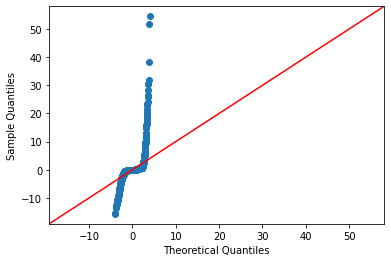

In [42]:

## then use sm's qqplot with line='45' fit=True
sm.graphics.qqplot(resids, fit=True, line='45');

### Residual Plot for Checking Homoscedasticity

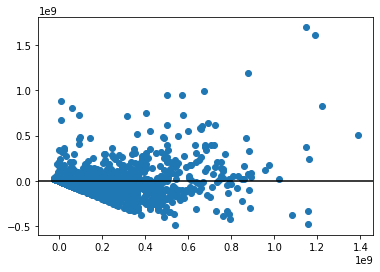

In [43]:
## Plot scatterplot with y_hat_test vs resids
fig,ax =plt.subplots()
ax.scatter(y_hat_train, resids)
ax.axhline(color='k')

### Putting it all together into a function

In [44]:
def evaluate_ols(result,X_train_df, y_train, show_summary=True):
    """Plots a Q-Q Plot and residual plot for a statsmodels OLS regression.
    """
    if show_summary==True:
        try:
            display(result.summary())
        except:
            pass
    
    ## save residuals from result
    y_pred = result.predict(X_train_df)
    resid = y_train - y_pred
    
    fig, axes = plt.subplots(ncols=2,figsize=(12,5))
    
    ## Normality 
    sm.graphics.qqplot(resid,line='45',fit=True,ax=axes[0]);
    
    ## Homoscedasticity
    ax = axes[1]
    ax.scatter(y_pred, resid, edgecolor='white',lw=1)
    ax.axhline(0,zorder=0)
    ax.set(ylabel='Residuals',xlabel='Predicted Value');
    plt.tight_layout()
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     3972.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:36   Log-Likelihood:            -8.4213e+05
No. Observations:               45097   AIC:                         1.684e+06
Df Residuals:                   45061   BIC:                         1.685e+06
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
adult                  1.371e+06   3.64e+06      0.376      0.707   -5.77e+06    8.51e+06
budget                    1.5448      0.014    110.732      0.000       1.517       1.572
popularity             1.419e+05   4441.421     31.954      0.000    1.33e+05    1.51e+05
runtime               -6249.4768   5192.945     -1.203      0.229   -1.64e+04    3928.782
vote_average          -4.954e+05   6.07e+04     -8.155      0.000   -6.14e+05   -3.76e+05
vote_count             2.895e+04    198.629    145.762      0.000    2.86e+04    2.93e+04
year                    2.57e+04   2.64e+04      0.972      0.331   -2.61e+04    7.75e+04
month                 -8.267e+04    4.2e+04     -1.968      0.049   -1.65e+05    -335.885
day                   -1.436e+04   1.62e+04     -0.886      0.376   -4.61e+04    1.74e+04
certification_G       -5.295e+06   6.82e+06     -0.776      0.438   -1.87e+07    8.08e+06
certification_MISSING -2.089e+06    6.7e+06     -0.312      0.755   -1.52e+07     1.1e+07
certification_NC-17   -6.958e+06   7.13e+06     -0.976      0.329   -2.09e+07    7.01e+06
certification_NR       -3.31e+06   6.72e+06     -0.492      0.622   -1.65e+07    9.87e+06
certification_PG      -1.681e+06    6.7e+06     -0.251      0.802   -1.48e+07    1.15e+07
certification_PG-13   -1.082e+07   6.67e+06     -1.623      0.105   -2.39e+07    2.25e+06
certification_R       -1.659e+07   6.64e+06     -2.500      0.012   -2.96e+07   -3.58e+06
belongs_to_collection  1.158e+07   6.56e+05     17.642      0.000    1.03e+07    1.29e+07
Genre_Family           -1.38e+06   7.42e+05     -1.859      0.063   -2.83e+06    7.49e+04
Genre_Animation        4.821e+05    9.2e+05      0.524      0.600   -1.32e+06    2.29e+06
Genre_Science Fiction -5.211e+06   6.74e+05     -7.730      0.000   -6.53e+06   -3.89e+06
Genre_Thriller        -1.327e+06   4.29e+05     -3.095      0.002   -2.17e+06   -4.86e+05
Genre_Mystery         -2.097e+06   6.88e+05     -3.046      0.002   -3.45e+06   -7.48e+05
Genre_Drama           -3.558e+05   3.37e+05     -1.054      0.292   -1.02e+06    3.06e+05
Genre_Romance           2.86e+04   4.59e+05      0.062      0.950   -8.72e+05    9.29e+05
Genre_Comedy          -3.946e+05   3.62e+05     -1.091      0.275    -1.1e+06    3.14e+05
Genre_War             -1.922e+06   1.23e+06     -1.559      0.119   -4.34e+06    4.95e+05
Genre_Crime           -2.812e+06   5.87e+05     -4.792      0.000   -3.96e+06   -1.66e+06
Genre_Action          -1.452e+06   5.04e+05     -2.880      0.004   -2.44e+06   -4.64e+05
Genre_Adventure        2.352e+06   7.41e+05      3.174      0.002       9e+05    3.81e+06
Genre_Horror          -5.668e+04   4.57e+05     -0.124      0.901   -9.53e+05     8.4e+05
Genre_Fantasy         -1.223e+06   7.42e+05     -1.648      0.099   -2.68e+06    2.31e+05
Genre_History         -

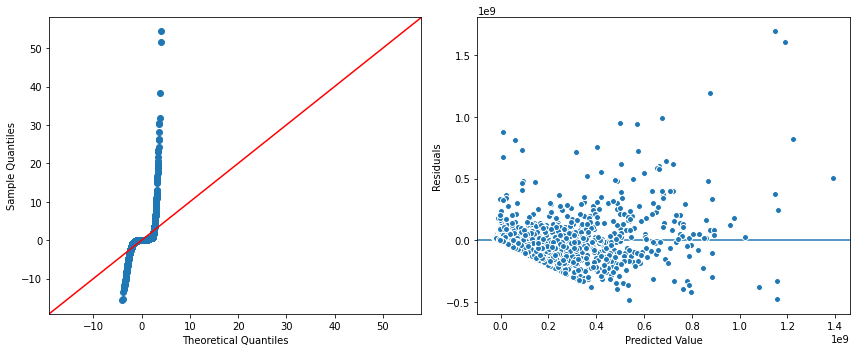

In [45]:
evaluate_ols(result,X_train_df, y_train)

# Improving Our Model:

> "Garbage In = Garbage Out"


- Before we dive into iterating on our model, I realized there were some big issues that I did not account for in the original data. 
    - some movies may not have been released. 
    - We should probably remove movies with 0 budget and revenue.
    

In [46]:
## reload the data
df = pd.read_csv(FOLDER+'combined_tmdb_data.csv.gz',lineterminator='\n')
df.head(2)

imdb_id  adult                     backdrop_path belongs_to_collection  \
0  tt0312305    0.0                               NaN                   NaN   
1  tt0326965    0.0  /xt2klJdKCVGXcoBGQrGfAS0aGDE.jpg                   NaN   

   budget                                             genres  \
0     0.0  [{'id': 10751, 'name': 'Family'}, {'id': 16, '...   
1     0.0  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   

                     homepage       id original_language  \
0  http://www.qqthemovie.com/  23738.0                en   
1    http://www.inmysleep.com  40048.0                en   

                           original_title  \
0  Quantum Quest: A Cassini Space Odyssey   
1                             In My Sleep   

                                            overview  popularity  \
0  Dave, a young photon, who is forced out of the...       2.769   
1  Marcus (Philip WInchester) wakes up in the mid...       6.120   

                        poster_path production_companies  \
0  /wflqNWF3BCwWJABjIbGWeM9hKHP.jpg                   []   
1  /sv9o6VYUQM2AbfmlTwDTn9238R5.jpg                   []   

                                production_countries release_date  revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2012-12-02      0.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   2010-04-23      0.0   

   runtime                                   spoken_languages    status  \
0     45.0  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   
1     90.0  [{'english_name': 'English', 'iso_639_1': 'en'...  Released   

                      tagline                                   title  video  \
0                         NaN  Quantum Quest: A Cassini Space Odyssey    0.0   
1  Sleepwalking Can Be Deadly                             In My Sleep    0.0   

   vote_average  vote_count certification  
0           8.4         7.0           NaN  
1           5.5        31.0         PG-13

### Repeating Feature Engineering

In [47]:
## Columns to exclude - Keeping Status and companies
drop_cols = ['backdrop_path','backdrop_path','original_title','overview',
                 'poster_path','tagline','id','homepage', #'status','production_companies'
                 'production_countries','video','spoken_languages',
            'original_language']
df = df.drop(columns=drop_cols)

## Use .notna() to get True if it belongs to a collection
df['belongs_to_collection'] = df['belongs_to_collection'].notna()

## Function to get just the genre names as a list 
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

## Use ourn function and exploding the new column
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')

## save unique genres
unique_genres = df_explode['genres_list'].dropna().unique()

## Manually One-Hot-Encode Genres
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex=False)    


## Drop original genre cols
df = df.drop(columns=['genres','genres_list'])


#### Fixing Certification
## Checking Certification values
df['certification'].value_counts(dropna=False)
# fix extra space certs
df['certification'] = df['certification'].str.strip()

## fix certification col
repl_cert = {'UR':'NR',
             'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',
             '10':np.nan,
             'ScreamFest Horror Film Festival':'NR'}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)


#### Converting year to sep features
## split release date into 3 columns
new_cols = ['year','month','day']
df[new_cols] = df['release_date'].str.split('-',expand=True)
df[new_cols] = df[new_cols].astype(float)

## drop original feature
df = df.drop(columns=['release_date'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305    0.0                  False          0.0       2.769   
1      tt0326965    0.0                  False          0.0       6.120   
2      tt0331312    0.0                  False          0.0       0.600   
3      tt0393049    0.0                  False     300000.0       2.418   
4      tt0398286    0.0                  False  260000000.0     119.168   
...          ...    ...                    ...          ...         ...   
60125  tt7661128    0.0                  False          0.0       0.600   
60126  tt7786614    0.0                  False          0.0       0.600   
60127  tt8170758    0.0                  False          0.0       0.600   
60128  tt9330112    0.0                  False          0.0       1.201   
60129  tt9556198    0.0                   True          0.0       0.840   

                                    production_companies      revenue  \
0                                                     []          0.0   
1                                                     []          0.0   
2                                                     []          0.0   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...          0.0   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...  592461732.0   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...     250000.0   
60126                                                 []          0.0   
60127                                                 []          0.0   
60128                                                 []          0.0   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...          0.0   

       runtime    status                                   title  \
0         45.0  Released  Quantum Quest: A Cassini Space Odyssey   
1         90.0  Released                             In My Sleep   
2          0.0  Released                      This Wretched Life   
3         98.0  Released                        Anderson's Cross   
4        100.0  Released                                 Tangled   
...        ...       ...                                     ...   
60125     77.0  Released                          Cold by Nature   
60126    100.0  Released                                  Tattoo   
60127     61.0  Released         The Swell Season: One Step Away   
60128    145.0  Released                      Ninaithale Inikkum   
60129     80.0  Released                  Deep Sea Monster Raiga   

       vote_average  vote_count certification  Genre_Family  Genre_Animation  \
0               8.4         7.0           NaN          True             True   
1               5.5        31.0         PG-13         False            False   
2               5.0         1.0           NaN         False            False   
3               4.0         5.0           NaN         False            False   
4               7.6      9364.0            PG          True             True   
...             ...         ...           ...           ...              ...   
60125           0.0         0.0         PG-13         False            False   
60126           5.0         1.0           NaN         False            False   
60127           0.0         0.0            NR         False            False   
60128           4.0         1.0           NaN         False            False   
60129           7.7         3.0           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False           False          False        False 

### New Filtering

- Make sure to only keep:
    1. Status=Released.
    2. Budget >0
    3. Revenue >0

In [48]:
## Check status
df['status'].value_counts()

Released           60097
Post Production       27
In Production          6
Name: status, dtype: int64

In [49]:
## Save only Released status
df = df.loc[ df['status'] == 'Released']
df = df.drop(columns=['status'])
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
0      tt0312305    0.0                  False          0.0       2.769   
1      tt0326965    0.0                  False          0.0       6.120   
2      tt0331312    0.0                  False          0.0       0.600   
3      tt0393049    0.0                  False     300000.0       2.418   
4      tt0398286    0.0                  False  260000000.0     119.168   
...          ...    ...                    ...          ...         ...   
60125  tt7661128    0.0                  False          0.0       0.600   
60126  tt7786614    0.0                  False          0.0       0.600   
60127  tt8170758    0.0                  False          0.0       0.600   
60128  tt9330112    0.0                  False          0.0       1.201   
60129  tt9556198    0.0                   True          0.0       0.840   

                                    production_companies      revenue  \
0                                                     []          0.0   
1                                                     []          0.0   
2                                                     []          0.0   
3      [{'id': 46102, 'logo_path': None, 'name': 'Ill...          0.0   
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...  592461732.0   
...                                                  ...          ...   
60125  [{'id': 117146, 'logo_path': None, 'name': 'JE...     250000.0   
60126                                                 []          0.0   
60127                                                 []          0.0   
60128                                                 []          0.0   
60129  [{'id': 64599, 'logo_path': None, 'name': 'SRS...          0.0   

       runtime                                   title  vote_average  \
0         45.0  Quantum Quest: A Cassini Space Odyssey           8.4   
1         90.0                             In My Sleep           5.5   
2          0.0                      This Wretched Life           5.0   
3         98.0                        Anderson's Cross           4.0   
4        100.0                                 Tangled           7.6   
...        ...                                     ...           ...   
60125     77.0                          Cold by Nature           0.0   
60126    100.0                                  Tattoo           5.0   
60127     61.0         The Swell Season: One Step Away           0.0   
60128    145.0                      Ninaithale Inikkum           4.0   
60129     80.0                  Deep Sea Monster Raiga           7.7   

       vote_count certification  Genre_Family  Genre_Animation  \
0             7.0           NaN          True             True   
1            31.0         PG-13         False            False   
2             1.0           NaN         False            False   
3             5.0           NaN         False            False   
4          9364.0            PG          True             True   
...           ...           ...           ...              ...   
60125         0.0         PG-13         False            False   
60126         1.0           NaN         False            False   
60127         0.0            NR         False            False   
60128         1.0           NaN         False            False   
60129         3.0           NaN         False            False   

       Genre_Science Fiction  Genre_Thriller  Genre_Mystery  Genre_Drama  \
0                       True           False          False        False   
1                      False            True           True         True   
2                      False           False          False        False   
3                      False           False          False         True   
4                      False           False          False        False   
...                      ...             ...            ...          ...   
60125                  False            T

In [50]:
## filter out financials that don't have financial data
df = df.loc[(df['budget'] >0 ) & (df['revenue']>0)]
df

imdb_id  adult  belongs_to_collection       budget  popularity  \
4      tt0398286    0.0                  False  260000000.0     119.168   
6      tt0411951    0.0                   True   30000000.0      70.694   
9      tt0427152    0.0                  False   69000000.0      21.747   
10     tt0429493    0.0                  False  110000000.0      56.494   
11     tt0435761    0.0                   True  200000000.0      93.983   
...          ...    ...                    ...          ...         ...   
59859  tt1532382    0.0                   True    3500000.0       4.838   
59887  tt1542960    0.0                  False     300000.0       1.937   
59923  tt1560950    0.0                   True        600.0       1.795   
59929  tt1565058    0.0                   True     125000.0       5.989   
59937  tt1569364    0.0                  False   10000000.0       6.687   

                                    production_companies       revenue  \
4      [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...  5.924617e+08   
6      [{'id': 5882, 'logo_path': None, 'name': 'Namc...  9.670000e+05   
9      [{'id': 2242, 'logo_path': None, 'name': 'Ever...  8.638786e+07   
10     [{'id': 10908, 'logo_path': None, 'name': 'Pho...  1.772388e+08   
11     [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...  1.066970e+09   
...                                                  ...           ...   
59859                                                 []  3.704408e+06   
59887  [{'id': 46722, 'logo_path': None, 'name': 'Gol...  2.000000e+05   
59923                                                 []  3.000000e+00   
59929  [{'id': 4580, 'logo_path': None, 'name': 'Cine...  3.470000e+06   
59937  [{'id': 1038, 'logo_path': '/o62j8ZNXmRTrq6Thv...  2.150000e+07   

       runtime                     title  vote_average  vote_count  \
4        100.0                   Tangled           7.6      9364.0   
6         92.0                    Tekken           5.4       553.0   
9        114.0       Dinner for Schmucks           5.6      1452.0   
10       117.0                The A-Team           6.4      3877.0   
11       103.0               Toy Story 3           7.8     12455.0   
...        ...                       ...           ...         ...   
59859     97.0        Hooked on the Game           6.3        42.0   
59887    122.0  The Figurine (Araromire)           4.2        11.0   
59923     81.0                   D@bbe 2           1.9        10.0   
59929     88.0            A Blood Pledge           5.4        40.0   
59937    102.0           Black Lightning           6.1       135.0   

      certification  Genre_Family  Genre_Animation  Genre_Science Fiction  \
4                PG          True             True                  False   
6                 R         False            False                   True   
9             PG-13         False            False                  False   
10            PG-13         False            False                  False   
11                G          True             True                  False   
...             ...           ...              ...                    ...   
59859           NaN         False            False                   True   
59887           NaN         False            False                  False   
59923           NaN         False            False                  False   
59929           NaN         False            False                  False   
59937            NR         False            False                  False   

       Genre_Thriller  Genre_Mystery  Genre_Drama  Genre_Romance  \
4               False          False        False          False   
6                True          False         True          False   
9               False          False        False          False   
10               True          False        False          False   
11              False          False        False          False   
...               ...            ...         

### Production Company

In [51]:
df['production_companies']

4        [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...
6        [{'id': 5882, 'logo_path': None, 'name': 'Namc...
9        [{'id': 2242, 'logo_path': None, 'name': 'Ever...
10       [{'id': 10908, 'logo_path': None, 'name': 'Pho...
11       [{'id': 3, 'logo_path': '/1TjvGVDMYsj6JBxOAkUH...
                               ...                        
59859                                                   []
59887    [{'id': 46722, 'logo_path': None, 'name': 'Gol...
59923                                                   []
59929    [{'id': 4580, 'logo_path': None, 'name': 'Cine...
59937    [{'id': 1038, 'logo_path': '/o62j8ZNXmRTrq6Thv...
Name: production_companies, Length: 5090, dtype: object

In [52]:
## getting longest string to check for multiple companies
idxmax = df['production_companies'].apply(len).idxmax()
idxmax 

44234

In [53]:
test = df.loc[idxmax, 'production_companies']
test

"[{'id': 53671, 'logo_path': None, 'name': 'Lantia Cinema & Audiovisivi', 'origin_country': ''}, {'id': 8, 'logo_path': '/78ilmDNTpdCfsakrsLqmAUkFTrO.png', 'name': 'Fine Line Features', 'origin_country': ''}, {'id': 76, 'logo_path': '/nebkQYtQKhZyHJfh5v0oGpNbPzu.png', 'name': 'Zentropa Entertainments', 'origin_country': 'DK'}, {'id': 119, 'logo_path': '/1di2gITGUZr730AMuMKiCrP90Vl.png', 'name': 'DR', 'origin_country': 'DK'}, {'id': 157, 'logo_path': None, 'name': 'SVT Drama', 'origin_country': ''}, {'id': 201, 'logo_path': '/6UIpEURdjnmcJPwgTDRzVRuwADr.png', 'name': 'ARTE', 'origin_country': 'FR'}, {'id': 321, 'logo_path': '/pfp6VWF3tYfOHHVRHpYe2iGcYrf.png', 'name': 'Memfis Film', 'origin_country': 'SE'}, {'id': 591, 'logo_path': '/q5I5RDwMEiqoNmfaJgd2LraEOJY.png', 'name': 'France 3 Cin√©ma', 'origin_country': 'FR'}, {'id': 2996, 'logo_path': None, 'name': 'Angel films', 'origin_country': ''}, {'id': 5975, 'logo_path': '/vvjgoKygWWYZvYyidT3RmOCq5If.png', 'name': 'YLE', 'origin_country'

In [54]:
# using regular expressions to extrap just the name
import re
exp= r"\'name\'\:.?\'(\w*.*?)\'"
re.findall(exp, test)

['Lantia Cinema & Audiovisivi',
 'Fine Line Features',
 'Zentropa Entertainments',
 'DR',
 'SVT Drama',
 'ARTE',
 'Memfis Film',
 'France 3 Cin√©ma',
 'Angel films',
 'YLE',
 'Blind Spot Pictures',
 'VPRO',
 'Liberator Productions',
 '√çslenska kvikmyndasamsteypan',
 'Pain Unlimited GmbH Filmproduktion',
 'Trust Film Svenska',
 'Cinematograph A/S',
 'What Else? B.V',
 'Filmek A/S',
 'Film4 Productions',
 'Canal+',
 'ARTE France Cin√©ma',
 'Film i V√§st',
 'TV 1000 Sverige',
 'WDR',
 'Constantin Film']

In [55]:
def get_prod_company_names(x):
    if x=='[]':
        return ["MISSING"]
    
    exp= r"\'name\'\:.?\'(\w*.*?)\'"
    companies = re.findall(exp, x)
    return companies

In [56]:
## test function
get_prod_company_names(test)

['Lantia Cinema & Audiovisivi',
 'Fine Line Features',
 'Zentropa Entertainments',
 'DR',
 'SVT Drama',
 'ARTE',
 'Memfis Film',
 'France 3 Cin√©ma',
 'Angel films',
 'YLE',
 'Blind Spot Pictures',
 'VPRO',
 'Liberator Productions',
 '√çslenska kvikmyndasamsteypan',
 'Pain Unlimited GmbH Filmproduktion',
 'Trust Film Svenska',
 'Cinematograph A/S',
 'What Else? B.V',
 'Filmek A/S',
 'Film4 Productions',
 'Canal+',
 'ARTE France Cin√©ma',
 'Film i V√§st',
 'TV 1000 Sverige',
 'WDR',
 'Constantin Film']

In [57]:
## Save new clean prod_comapny col and explode
df['prod_company'] = df['production_companies'].apply(get_prod_company_names)
prod_companies = df['prod_company'].explode()
prod_companies.value_counts().head(49)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8903/4230646071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prod_company'] = df['production_companies'].apply(get_prod_company_names)


Universal Pictures           285
Warner Bros. Pictures        281
Columbia Pictures            234
20th Century Fox             195
Paramount                    178
MISSING                      167
Canal+                       152
New Line Cinema              143
Walt Disney Pictures         135
Relativity Media             123
Lionsgate                    121
DreamWorks Pictures           99
Metro-Goldwyn-Mayer           98
StudioCanal                   96
Village Roadshow Pictures     91
Touchstone Pictures           76
Miramax                       74
Summit Entertainment          72
Dune Entertainment            72
Screen Gems                   69
TSG Entertainment             67
Focus Features                66
Fox Searchlight Pictures      64
Sony Pictures                 62
Regency Enterprises           62
Working Title Films           56
Blumhouse Productions         55
Dimension Films               55
Legendary Pictures            51
The Weinstein Company         50
Millennium

In [58]:
prod_companies.nunique()

6367

In [59]:
# df['prod_company'].nunique()

- Common Prod Company Encoding:
    - Keep top 50 most common companies an one hot encode

In [60]:
## saving the 50 most common companies
common_companies = sorted(prod_companies.value_counts().head(50).index)
common_companies

['20th Century Fox',
 'BBC Films',
 'Blumhouse Productions',
 'CJ Entertainment',
 'Canal+',
 'Cin√©+',
 'Columbia Pictures',
 'Dimension Films',
 'DreamWorks Animation',
 'DreamWorks Pictures',
 'Dune Entertainment',
 'Epsilon Motion Pictures',
 'EuropaCorp',
 'Film4 Productions',
 'Focus Features',
 'Fox 2000 Pictures',
 'Fox Searchlight Pictures',
 'France 2 Cin√©ma',
 'France 3 Cin√©ma',
 'Ingenious Media',
 'Legendary Pictures',
 'Lionsgate',
 'MISSING',
 'Metro-Goldwyn-Mayer',
 'Millennium Films',
 'Miramax',
 'New Line Cinema',
 'New Regency Pictures',
 'Original Film',
 'Paramount',
 'Participant',
 'Regency Enterprises',
 'Relativity Media',
 'Revolution Studios',
 'Scott Free Productions',
 'Scott Rudin Productions',
 'Screen Gems',
 'Sony Pictures',
 'Spyglass Entertainment',
 'StudioCanal',
 'Summit Entertainment',
 'TF1 Films Production',
 'TSG Entertainment',
 'The Weinstein Company',
 'Touchstone Pictures',
 'Universal Pictures',
 'Village Roadshow Pictures',
 'Walt Disn

In [61]:
## manually ohe top 20 companies
for company in common_companies:
    df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8903/197917080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8903/197917080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8903/197917080.py:3: 

/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8903/197917080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8903/197917080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"ProdComp_{company}"] = df['production_companies'].str.contains(company, regex=False)
/var/folders/rf/vw4r41jd7vd95x1w0dth7v9h0000gp/T/ipykernel_8903/197917080.py:3: 

In [62]:
## Dropping columns
drop_for_model = ['title','imdb_id','prod_company','production_companies']
df = df.drop(columns=drop_for_model)
df

adult  belongs_to_collection       budget  popularity       revenue  \
4        0.0                  False  260000000.0     119.168  5.924617e+08   
6        0.0                   True   30000000.0      70.694  9.670000e+05   
9        0.0                  False   69000000.0      21.747  8.638786e+07   
10       0.0                  False  110000000.0      56.494  1.772388e+08   
11       0.0                   True  200000000.0      93.983  1.066970e+09   
...      ...                    ...          ...         ...           ...   
59859    0.0                   True    3500000.0       4.838  3.704408e+06   
59887    0.0                  False     300000.0       1.937  2.000000e+05   
59923    0.0                   True        600.0       1.795  3.000000e+00   
59929    0.0                   True     125000.0       5.989  3.470000e+06   
59937    0.0                  False   10000000.0       6.687  2.150000e+07   

       runtime  vote_average  vote_count certification  Genre_Family  \
4        100.0           7.6      9364.0            PG          True   
6         92.0           5.4       553.0             R         False   
9        114.0           5.6      1452.0         PG-13         False   
10       117.0           6.4      3877.0         PG-13         False   
11       103.0           7.8     12455.0             G          True   
...        ...           ...         ...           ...           ...   
59859     97.0           6.3        42.0           NaN         False   
59887    122.0           4.2        11.0           NaN         False   
59923     81.0           1.9        10.0           NaN         False   
59929     88.0           5.4        40.0           NaN         False   
59937    102.0           6.1       135.0            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
11                True                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
11           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False  

# Checking for Linearity

In [63]:
## concatenating training data into plot_df
plot_df = pd.concat([X_train_df,y_train],axis=1)
plot_df

adult    budget  popularity  runtime  vote_average  vote_count    year  \
9538     0.0       0.0       1.113     80.0           5.3         5.0  2013.0   
16553    0.0       0.0       1.875     92.0           6.0         2.0  2015.0   
34106    0.0       0.0       1.499    101.0           2.0         1.0  2020.0   
3804     0.0       0.0       1.506    100.0           7.7         3.0  2011.0   
37747    0.0  300000.0       0.600    138.0           5.0         2.0  2020.0   
...      ...       ...         ...      ...           ...         ...     ...   
5929     0.0       0.0       1.400     95.0           5.0         4.0  2012.0   
43807    0.0  100000.0       1.660     82.0           4.8         4.0  2021.0   
4220     0.0       0.0       0.843     92.0           0.0         0.0  2011.0   
6682     0.0       0.0       3.976    113.0           6.0        18.0  2012.0   
31732    0.0       0.0       3.059    159.0           6.5         8.0  2018.0   

       month   day  certification_G  certification_MISSING  \
9538    10.0   1.0              0.0                    1.0   
16553    4.0  15.0              0.0                    1.0   
34106   11.0   4.0              0.0                    0.0   
3804     9.0  24.0              0.0                    0.0   
37747    9.0  18.0              0.0                    1.0   
...      ...   ...              ...                    ...   
5929    10.0   4.0              0.0                    1.0   
43807    2.0  12.0              0.0                    1.0   
4220    10.0   7.0              0.0                    1.0   
6682     6.0  11.0              0.0                    0.0   
31732   11.0  29.0              0.0                    1.0   

       certification_NC-17  certification_NR  certification_PG  \
9538                   0.0               0.0               0.0   
16553                  0.0               0.0               0.0   
34106                  0.0               0.0               0.0   
3804                   0.0               0.0               1.0   
37747                  0.0               0.0               0.0   
...                    ...               ...               ...   
5929                   0.0               0.0               0.0   
43807                  0.0               0.0               0.0   
4220                   0.0               0.0               0.0   
6682                   0.0               1.0               0.0   
31732                  0.0               0.0               0.0   

       certification_PG-13  certification_R  belongs_to_collection  \
9538                   0.0              0.0                    0.0   
16553                  0.0              0.0                    0.0   
34106                  0.0              1.0                    0.0   
3804                   0.0              0.0                    0.0   
37747                  0.0              0.0                    0.0   
...                    ...              ...                    ...   
5929                   0.0              0.0                    0.0   
43807                  0.0              0.0                    0.0   
4220                   0.0              0.0                    0.0   
6682                   0.0              0.0                    1.0   
31732                  0.0              0.0                    0.0   

       Genre_Family  Genre_Animation  Genre_Science Fiction  Genre_Thriller  \
9538            1.0              0.0                    0.0             0.0   
16553           0.0              0.0                    0.0             0.0   
34106           0.0              0.0                    0.0             0.0   
3804            0.0              0.0                    1.0             0.0   
37747           0.0              0.0                    0.0             0.0   
...             ...              ...                    ...             ...   
5929            0.0              0.0                    0.0             1.0   
43807           0.0    

In [64]:
## save plot_cols list to show (dropping genre from plot_df from pair_plot)
genre_cols = [c for c in plot_df if c.startswith('Genre')]
comp_cols = [c for c in plot_df if c.startswith('ProdComp')]

plot_cols = plot_df.drop(columns=[*genre_cols, *comp_cols]).columns
plot_cols


Index(['adult', 'budget', 'popularity', 'runtime', 'vote_average',
       'vote_count', 'year', 'month', 'day', 'certification_G',
       'certification_MISSING', 'certification_NC-17', 'certification_NR',
       'certification_PG', 'certification_PG-13', 'certification_R',
       'belongs_to_collection', 'const', 'revenue'],
      dtype='object')

In [65]:
len(plot_cols)

19

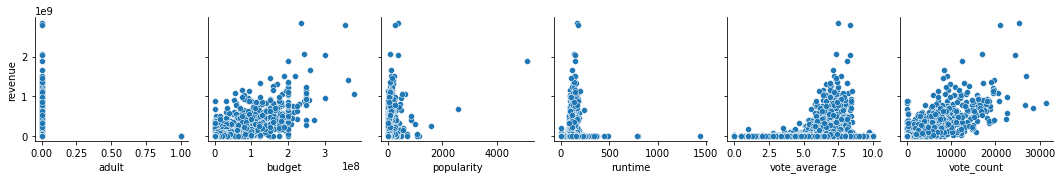

In [66]:
## Plot first 6 features
sns.pairplot(data=plot_df, y_vars='revenue', x_vars=plot_cols[:6])

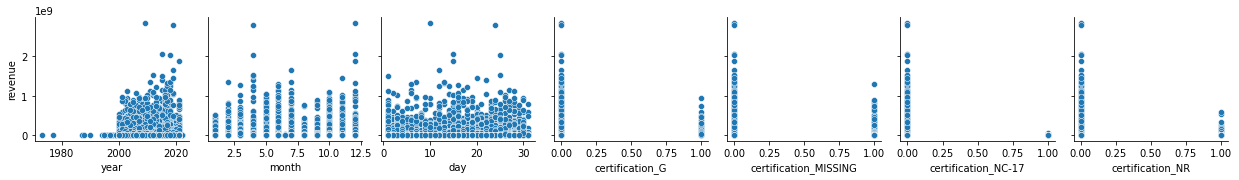

In [67]:
## Plot next 6 features
sns.pairplot(data=plot_df, y_vars='revenue', x_vars=plot_cols[6:13])

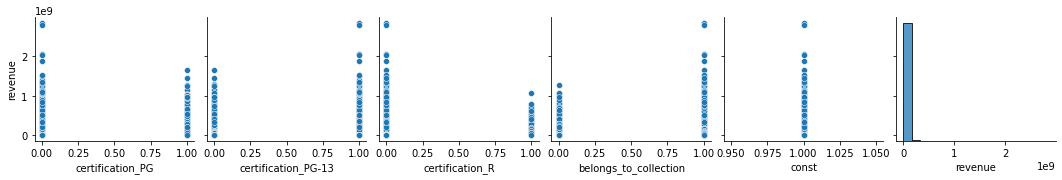

In [68]:
## plot remaining features
sns.pairplot(data=plot_df, y_vars='revenue', x_vars=plot_cols[13:])

- Shouldn't have years before 2000, so drop. 
- Check outliers in popularity, runtime


In [69]:
# remove movies prior to 2000
df = df.loc[ df['year']>=2000]
df

adult  belongs_to_collection       budget  popularity       revenue  \
4        0.0                  False  260000000.0     119.168  5.924617e+08   
6        0.0                   True   30000000.0      70.694  9.670000e+05   
9        0.0                  False   69000000.0      21.747  8.638786e+07   
10       0.0                  False  110000000.0      56.494  1.772388e+08   
11       0.0                   True  200000000.0      93.983  1.066970e+09   
...      ...                    ...          ...         ...           ...   
59859    0.0                   True    3500000.0       4.838  3.704408e+06   
59887    0.0                  False     300000.0       1.937  2.000000e+05   
59923    0.0                   True        600.0       1.795  3.000000e+00   
59929    0.0                   True     125000.0       5.989  3.470000e+06   
59937    0.0                  False   10000000.0       6.687  2.150000e+07   

       runtime  vote_average  vote_count certification  Genre_Family  \
4        100.0           7.6      9364.0            PG          True   
6         92.0           5.4       553.0             R         False   
9        114.0           5.6      1452.0         PG-13         False   
10       117.0           6.4      3877.0         PG-13         False   
11       103.0           7.8     12455.0             G          True   
...        ...           ...         ...           ...           ...   
59859     97.0           6.3        42.0           NaN         False   
59887    122.0           4.2        11.0           NaN         False   
59923     81.0           1.9        10.0           NaN         False   
59929     88.0           5.4        40.0           NaN         False   
59937    102.0           6.1       135.0            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
11                True                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
11           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False  

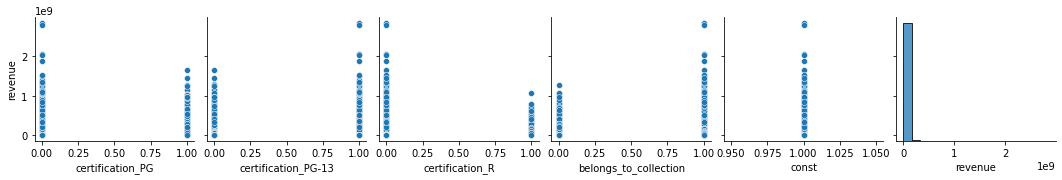

In [70]:
## plot remaining features
sns.pairplot(data=plot_df, y_vars='revenue', x_vars=plot_cols[13:])

> Now need to recreate X and y varaibles

### Functionize ALL of the preprocessing

In [71]:
def get_train_test_split(df_, y_col='revenue',drop_cols=[]):
    
    ## Make copy of input df
    df = df_.copy()
    
    ## filter columns in drop cols (if exist)
    final_drop_cols = []
    [df.drop(columns=c,inplace=True) for c in df.columns if c in drop_cols]
    
    
    ## Make x and y variables
    y = df[y_col].copy()
    X = df.drop(columns=[y_col]).copy()

    X_train, X_test, y_train, y_test = train_test_split(X,y)#, random_state=321)
    

    
    ## make cat selector and using it to save list of column names
    cat_select = make_column_selector(dtype_include='object')
    cat_cols = cat_select(X_train)


    ## make num selector and using it to save list of column names
    num_select = make_column_selector(dtype_include='number')
    num_cols = num_select(X_train)


    ## select manually OHE cols for later
    bool_select = make_column_selector(dtype_include='bool')
    already_ohe_cols = bool_select(X_train)

    ## convert manual ohe to int
    X_train[already_ohe_cols] = X_train[already_ohe_cols].astype(int)
    X_test[already_ohe_cols] = X_test[already_ohe_cols].astype(int)

    ## make pipelines
    cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                           fill_value='MISSING'),
                             OneHotEncoder(handle_unknown='ignore', sparse=False))
    num_pipe = make_pipeline(SimpleImputer(strategy='mean'),#StandardScaler()
                            )

    preprocessor = make_column_transformer((num_pipe, num_cols),
                                           (cat_pipe,cat_cols),remainder='passthrough')
    
    

    ## fit the col transformer
    preprocessor.fit(X_train)

    ## Finding the categorical pipeline in our col transformer.
    preprocessor.named_transformers_['pipeline-2']

    ## B) Using list-slicing to find the encoder 
    cat_features = preprocessor.named_transformers_['pipeline-2'][-1].get_feature_names_out(cat_cols)


    ## Create the empty list
    final_features = [*cat_features,*num_cols,*already_ohe_cols]

    ## Make df verisons of x data
    X_train_tf = pd.DataFrame( preprocessor.transform(X_train), 
                              columns=final_features, index=X_train.index)


    X_test_tf = pd.DataFrame( preprocessor.transform(X_test),
                             columns=final_features, index=X_test.index)


    ### Adding a Constant for Statsmodels
    ## Make final X_train_df and X_test_df with constants added
    X_train_df = sm.add_constant(X_train_tf, prepend=False, has_constant='add')
    X_test_df = sm.add_constant(X_test_tf, prepend=False, has_constant='add')
    return X_train_df, y_train, X_test_df, y_test


### Model #1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     147.6
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:40   Log-Likelihood:                -75190.
No. Observations:                3810   AIC:                         1.505e+05
Df Residuals:                    3726   BIC:                         1.511e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                     2.548e+06   9.13e+07      0.028      0.978   -1.76e+08    1.81e+08
certification_MISSING                  1.7563      0.057     30.548      0.000       1.644       1.869
certification_NC-17                 1.525e+05   1.46e+04     10.458      0.000    1.24e+05    1.81e+05
certification_NR                    1.621e+05   8.47e+04      1.913      0.056   -4060.252    3.28e+05
certification_PG                   -3.458e+06   1.46e+06     -2.368      0.018   -6.32e+06   -5.95e+05
certification_PG-13                  2.92e+04    673.775     43.335      0.000    2.79e+04    3.05e+04
certification_R                     2.775e+05   2.86e+05      0.971      0.332   -2.83e+05    8.38e+05
adult                              -1.721e+05   4.39e+05     -0.392      0.695   -1.03e+06    6.88e+05
budget                             -5.609e+04   1.73e+05     -0.324      0.746   -3.96e+05    2.84e+05
popularity                         -7.681e+07   7.21e+07     -1.065      0.287   -2.18e+08    6.46e+07
runtime                            -6.428e+07   7.25e+07     -0.887      0.375   -2.06e+08    7.78e+07
vote_average                       -6.238e+07   7.65e+07     -0.816      0.415   -2.12e+08    8.75e+07
vote_count                         -7.094e+07   7.26e+07     -0.978      0.328   -2.13e+08    7.13e+07
year                               -6.434e+07   7.21e+07     -0.893      0.372   -2.06e+08     7.7e+07
month                              -7.348e+07   7.19e+07     -1.021      0.307   -2.15e+08    6.76e+07
day                                -9.041e+07   7.19e+07     -1.257      0.209   -2.31e+08    5.06e+07
belongs_to_collection               4.758e+07      4e+06     11.903      0.000    3.97e+07    5.54e+07
Genre_Family                       -1.482e+07   7.59e+06     -1.953      0.051   -2.97e+07    5.99e+04
Genre_Animation                     2.149e+07   8.25e+06      2.605      0.009    5.31e+06    3.77e+07
Genre_Science Fiction               -3.32e+07   5.57e+06     -5.962      0.000   -4.41e+07   -2.23e+07
Genre_Thriller                     -3.175e+06   4.11e+06     -0.772      0.440   -1.12e+07    4.89e+06
Genre_Mystery                       -9.44e+06   5.76e+06     -1.640      0.101   -2.07e+07    1.85e+06
Genre_Drama                         4.562e+06   3.89e+06      1.173      0.241   -3.06e+06    1.22e+07
Genre_Romance                       6.703e+06   4.33e+06      1.547      0.122   -1.79e+06    1.52e+07
Genre_Comedy                        6.579e+06   3.89e+06      1.693      0.091   -1.04e+06    1.42e+07
Genre_War                          -1.236e+06   8.49e+06     -0.146      0.884   -1.79e+07    1.54e+07
Genre_Crime                        -1.794e+06   4.78e+06     -0.375      0.708   -1.12e+07    7.

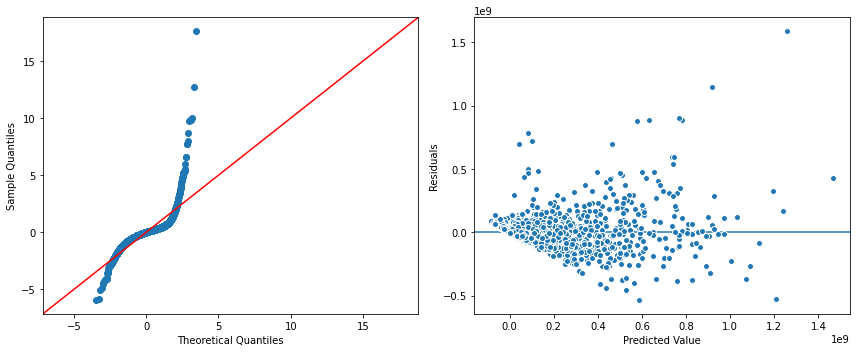

In [72]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)
X_train_df

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result, X_train_df, y_train)

> How did we do? Did we meet the assumptions better?

## Removing Outliers

### Using Z-Score Rule

In [73]:
from scipy import stats
def find_outliers(data, verbose=True):
    outliers = np.abs(stats.zscore(data))>3
    
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using Z-Scores.")
    return outliers

In [74]:
find_outliers(df['runtime'])

- 0 outliers found in runtime using Z-Scores.


4        False
6        False
9        False
10       False
11       False
         ...  
59859    False
59887    False
59923    False
59929    False
59937    False
Name: runtime, Length: 5081, dtype: bool

In [75]:
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers = {}

for col in outlier_cols:
    col_outliers = find_outliers(df[col])
    
    outliers[col] = col_outliers

- 0 outliers found in runtime using Z-Scores.
- 34 outliers found in popularity using Z-Scores.
- 128 outliers found in revenue using Z-Scores.


In [76]:
# Make new df_clean copy of df
df_clean = df.copy()

## loop through dictionary to remove outliers
for col, col_outliers in outliers.items():
    df_clean  = df_clean.loc[~col_outliers]

In [77]:
df_clean

adult  belongs_to_collection       budget  popularity      revenue  \
4        0.0                  False  260000000.0     119.168  592461732.0   
6        0.0                   True   30000000.0      70.694     967000.0   
9        0.0                  False   69000000.0      21.747   86387857.0   
10       0.0                  False  110000000.0      56.494  177238796.0   
14       0.0                  False   85000000.0      36.998   48000000.0   
...      ...                    ...          ...         ...          ...   
59859    0.0                   True    3500000.0       4.838    3704408.0   
59887    0.0                  False     300000.0       1.937     200000.0   
59923    0.0                   True        600.0       1.795          3.0   
59929    0.0                   True     125000.0       5.989    3470000.0   
59937    0.0                  False   10000000.0       6.687   21500000.0   

       runtime  vote_average  vote_count certification  Genre_Family  \
4        100.0           7.6      9364.0            PG          True   
6         92.0           5.4       553.0             R         False   
9        114.0           5.6      1452.0         PG-13         False   
10       117.0           6.4      3877.0         PG-13         False   
14       112.0           7.5      6331.0         PG-13         False   
...        ...           ...         ...           ...           ...   
59859     97.0           6.3        42.0           NaN         False   
59887    122.0           4.2        11.0           NaN         False   
59923     81.0           1.9        10.0           NaN         False   
59929     88.0           5.4        40.0           NaN         False   
59937    102.0           6.1       135.0            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
4                 True                  False           False          False   
6                False                   True            True          False   
9                False                  False           False          False   
10               False                  False            True          False   
14               False                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
4            False          False         False      False        False   
6             True          False         False      False         True   
9            False          False          True      False        False   
10           False          False          True      False         True   
14           False           True          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
4             False            False         False          False   
6              True            False         False          False   
9             False            False         False          False   
10             True             True         False          False   
14        

### Model 2: Outliers Removed (Z_scores)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     146.4
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:40   Log-Likelihood:                -71045.
No. Observations:                3696   AIC:                         1.423e+05
Df Residuals:                    3613   BIC:                         1.428e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                        6.2898      8.315      0.756      0.449     -10.013      22.592
certification_MISSING                  1.2373      0.040     31.251      0.000       1.160       1.315
certification_NC-17                 1.765e+05   3.82e+04      4.620      0.000    1.02e+05    2.51e+05
certification_NR                     1.44e+05   5.18e+04      2.778      0.005    4.24e+04    2.46e+05
certification_PG                   -7.562e+05   9.06e+05     -0.835      0.404   -2.53e+06    1.02e+06
certification_PG-13                 2.163e+04    514.967     42.012      0.000    2.06e+04    2.26e+04
certification_R                     -1.49e+05    1.8e+05     -0.826      0.409   -5.03e+05    2.05e+05
adult                              -1.479e+05   2.65e+05     -0.559      0.576   -6.67e+05    3.71e+05
budget                              2.479e+04   1.05e+05      0.236      0.814   -1.81e+05    2.31e+05
popularity                          3.958e+07   4.55e+07      0.870      0.384   -4.96e+07    1.29e+08
runtime                             3.679e+07   4.57e+07      0.805      0.421   -5.28e+07    1.26e+08
vote_average                        3.575e+07   4.76e+07      0.750      0.453   -5.77e+07    1.29e+08
vote_count                          3.654e+07   4.59e+07      0.797      0.426   -5.34e+07    1.26e+08
year                                4.416e+07   4.55e+07      0.971      0.332    -4.5e+07    1.33e+08
month                               3.176e+07   4.54e+07      0.700      0.484   -5.72e+07    1.21e+08
day                                 2.068e+07   4.53e+07      0.456      0.648   -6.82e+07     1.1e+08
belongs_to_collection               3.681e+07   2.54e+06     14.507      0.000    3.18e+07    4.18e+07
Genre_Family                       -9.461e+06   4.76e+06     -1.986      0.047   -1.88e+07   -1.21e+05
Genre_Animation                     9.328e+06   5.05e+06      1.847      0.065   -5.73e+05    1.92e+07
Genre_Science Fiction              -2.352e+07   3.46e+06     -6.790      0.000   -3.03e+07   -1.67e+07
Genre_Thriller                      2.571e+05   2.52e+06      0.102      0.919   -4.68e+06    5.19e+06
Genre_Mystery                      -3.312e+06   3.46e+06     -0.958      0.338   -1.01e+07    3.47e+06
Genre_Drama                        -1.403e+06   2.38e+06     -0.590      0.555   -6.06e+06    3.26e+06
Genre_Romance                        5.09e+06   2.58e+06      1.974      0.048    3.52e+04    1.01e+07
Genre_Comedy                        8.141e+06   2.35e+06      3.470      0.001    3.54e+06    1.27e+07
Genre_War                          -6.599e+05   5.09e+06     -0.130      0.897   -1.06e+07    9.32e+06
Genre_Crime                        -5.467e+06   2.87e+06     -1.902      0.057   -1.11e+07    1.

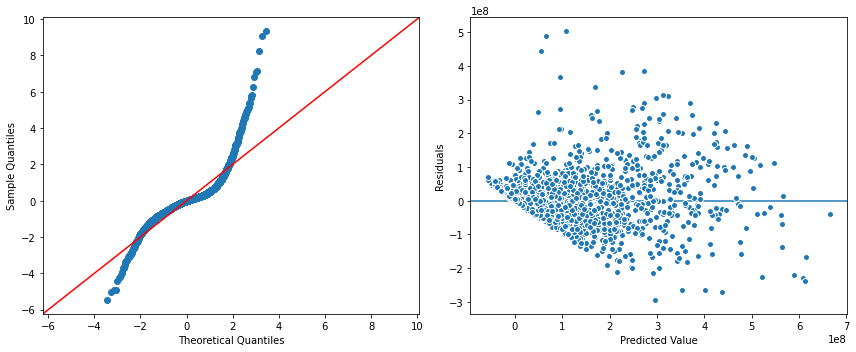

In [78]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean)


## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result, X_train_df, y_train)

### Removing Outliers - Using IQR Rule

<AxesSubplot:xlabel='revenue'>

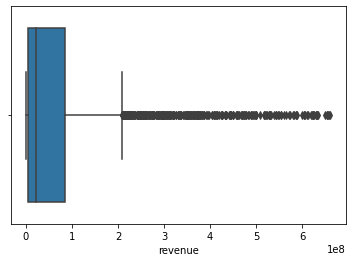

In [79]:
## visualzie outlier-removed target
sns.boxplot(x = y_train)

In [80]:
def find_outliers_IQR(data, verbose=True):
    q3 = np.quantile(data,.75)
    q1 = np.quantile(data,.25)

    IQR = q3 - q1
    upper_threshold = q3 + 1.5*IQR
    lower_threshold = q1 - 1.5*IQR
    
    outliers = (data<lower_threshold) | (data>upper_threshold)
    if verbose:
        print(f"- {outliers.sum()} outliers found in {data.name} using IQR.")
        
    return outliers

In [81]:
outliers_z = find_outliers(df['revenue'])
outliers_iqr = find_outliers_IQR(df['revenue'])

- 128 outliers found in revenue using Z-Scores.
- 540 outliers found in revenue using IQR.


In [82]:
## Loop to remove outliers from same clumns using new function
outlier_cols = ['runtime','popularity','revenue']

## Empty dict for both types of outliers
## save a dictionary of the T/F outlier index for each feature in outleir_cols
outlier_cols = ['runtime','popularity','revenue']

outliers_z = {}
outliers_IQR = {}

for col in outlier_cols:
    col_outliers_z = find_outliers(df[col])
    outliers_z[col] = col_outliers_z
    
    col_outliers_iqr = find_outliers_IQR(df[col])
    outliers_IQR[col] = col_outliers_iqr
    print()
## Use both functions to see the comparison for # of outliers


- 0 outliers found in runtime using Z-Scores.
- 0 outliers found in runtime using IQR.

- 34 outliers found in popularity using Z-Scores.
- 518 outliers found in popularity using IQR.

- 128 outliers found in revenue using Z-Scores.
- 540 outliers found in revenue using IQR.



In [83]:
# # remove_outliers - create df_clean_z
# df_clean_z = df.copy()

# ## loop though outliers_z


In [84]:
# Make new df_clean copy of df
df_clean_iqr = df.copy()

## loop through dictionary to remove outliers
for col, col_outliers in outliers_IQR.items():
    df_clean_iqr  = df_clean_iqr.loc[~col_outliers]
df_clean_iqr

adult  belongs_to_collection       budget  popularity      revenue  \
9        0.0                  False   69000000.0      21.747   86387857.0   
10       0.0                  False  110000000.0      56.494  177238796.0   
14       0.0                  False   85000000.0      36.998   48000000.0   
17       0.0                  False   20000000.0      19.663   54956140.0   
22       0.0                   True   24000000.0      48.675   83188165.0   
...      ...                    ...          ...         ...          ...   
59859    0.0                   True    3500000.0       4.838    3704408.0   
59887    0.0                  False     300000.0       1.937     200000.0   
59923    0.0                   True        600.0       1.795          3.0   
59929    0.0                   True     125000.0       5.989    3470000.0   
59937    0.0                  False   10000000.0       6.687   21500000.0   

       runtime  vote_average  vote_count certification  Genre_Family  \
9        114.0           5.6      1452.0         PG-13         False   
10       117.0           6.4      3877.0         PG-13         False   
14       112.0           7.5      6331.0         PG-13         False   
17       101.0           6.2      1615.0             R         False   
22        88.0           5.4      1754.0             R         False   
...        ...           ...         ...           ...           ...   
59859     97.0           6.3        42.0           NaN         False   
59887    122.0           4.2        11.0           NaN         False   
59923     81.0           1.9        10.0           NaN         False   
59929     88.0           5.4        40.0           NaN         False   
59937    102.0           6.1       135.0            NR         False   

       Genre_Animation  Genre_Science Fiction  Genre_Thriller  Genre_Mystery  \
9                False                  False           False          False   
10               False                  False            True          False   
14               False                  False           False          False   
17               False                  False           False           True   
22               False                  False           False          False   
...                ...                    ...             ...            ...   
59859            False                   True           False          False   
59887            False                  False           False           True   
59923            False                  False           False           True   
59929            False                  False           False          False   
59937            False                  False           False          False   

       Genre_Drama  Genre_Romance  Genre_Comedy  Genre_War  Genre_Crime  \
9            False          False          True      False        False   
10           False          False          True      False         True   
14           False           True          True      False        False   
17           False          False         False      False        False   
22           False          False          True      False        False   
...            ...            ...           ...        ...          ...   
59859        False          False         False      False        False   
59887         True          False         False      False        False   
59923        False          False         False      False        False   
59929        False          False         False      False        False   
59937        False          False         False      False        False   

       Genre_Action  Genre_Adventure  Genre_Horror  Genre_Fantasy  \
9             False            False         False          False   
10             True             True         False          False   
14             True            False         False           True   
17             True            False          True          False   
22        

### Model 3 - IQR Outliers Removed

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     72.08
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:40   Log-Likelihood:                -60195.
No. Observations:                3229   AIC:                         1.206e+05
Df Residuals:                    3145   BIC:                         1.211e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
certification_G                    -6.647e+06   3.07e+07     -0.217      0.829   -6.68e+07    5.35e+07
certification_MISSING                  0.7750      0.030     25.571      0.000       0.716       0.834
certification_NC-17                 4.591e+05   6.65e+04      6.904      0.000    3.29e+05    5.89e+05
certification_NR                    9.453e+04   3.02e+04      3.133      0.002    3.54e+04    1.54e+05
certification_PG                    8.053e+05   5.19e+05      1.553      0.121   -2.11e+05    1.82e+06
certification_PG-13                 1.212e+04    484.919     24.999      0.000    1.12e+04    1.31e+04
certification_R                    -3.693e+05   1.08e+05     -3.413      0.001   -5.81e+05   -1.57e+05
adult                              -1.019e+05   1.59e+05     -0.640      0.522   -4.14e+05     2.1e+05
budget                               1.38e+04   6.35e+04      0.217      0.828   -1.11e+05    1.38e+05
popularity                          9.879e+07   2.73e+07      3.616      0.000    4.52e+07    1.52e+08
runtime                             9.024e+07   2.74e+07      3.288      0.001    3.64e+07    1.44e+08
vote_average                        8.808e+07   2.84e+07      3.104      0.002    3.24e+07    1.44e+08
vote_count                          9.156e+07   2.75e+07      3.328      0.001    3.76e+07    1.46e+08
year                                  9.5e+07   2.73e+07      3.481      0.001    4.15e+07    1.49e+08
month                               9.162e+07   2.73e+07      3.362      0.001    3.82e+07    1.45e+08
day                                 8.173e+07   2.72e+07      3.005      0.003    2.84e+07    1.35e+08
belongs_to_collection               1.803e+07   1.63e+06     11.089      0.000    1.48e+07    2.12e+07
Genre_Family                        1.945e+06   2.76e+06      0.705      0.481   -3.47e+06    7.36e+06
Genre_Animation                    -5.409e+06   3.29e+06     -1.644      0.100   -1.19e+07    1.04e+06
Genre_Science Fiction              -1.648e+07   2.26e+06     -7.284      0.000   -2.09e+07    -1.2e+07
Genre_Thriller                      1.745e+05   1.52e+06      0.115      0.909   -2.81e+06    3.16e+06
Genre_Mystery                      -3.006e+05   2.08e+06     -0.144      0.885   -4.38e+06    3.78e+06
Genre_Drama                        -5.702e+06    1.4e+06     -4.084      0.000   -8.44e+06   -2.96e+06
Genre_Romance                       4.483e+06    1.5e+06      2.981      0.003    1.53e+06    7.43e+06
Genre_Comedy                        5.429e+06   1.41e+06      3.858      0.000    2.67e+06    8.19e+06
Genre_War                          -2.583e+05   2.95e+06     -0.088      0.930   -6.03e+06    5.52e+06
Genre_Crime                        -1.862e+06    1.7e+06     -1.094      0.274    -5.2e+06    1.

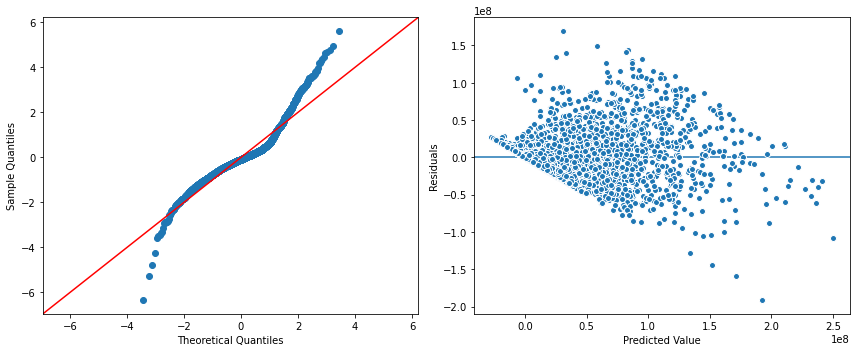

In [85]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)
X_train_df

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result, X_train_df, y_train)

> How are we doing??

In [86]:
## get pvalues from model result
pvalues =result.pvalues
pvalues

certification_G                        8.285066e-01
certification_MISSING                 3.406723e-131
certification_NC-17                    6.076350e-12
certification_NR                       1.744040e-03
certification_PG                       1.205433e-01
                                          ...      
ProdComp_Village Roadshow Pictures     1.699417e-01
ProdComp_Walt Disney Pictures          1.228769e-03
ProdComp_Warner Bros. Pictures         7.760819e-01
ProdComp_Working Title Films           3.545424e-01
const                                  8.275132e-04
Length: 87, dtype: float64

In [87]:
## Check for p-values that are >.05
pvalues[pvalues>.05]

certification_G                       0.828507
certification_PG                      0.120543
adult                                 0.522203
budget                                0.828015
Genre_Family                          0.481013
Genre_Animation                       0.100318
Genre_Thriller                        0.908674
Genre_Mystery                         0.885205
Genre_War                             0.930131
Genre_Crime                           0.273954
Genre_Action                          0.682015
Genre_Horror                          0.900444
Genre_History                         0.303025
Genre_Music                           0.637212
Genre_Documentary                     0.533261
Genre_TV Movie                        0.271716
ProdComp_BBC Films                    0.717981
ProdComp_Canal+                       0.864983
ProdComp_Cin√©+                        0.783391
ProdComp_Dimension Films              0.565871
ProdComp_DreamWorks Animation         0.550630
ProdComp_Eps

## Removing features - based on p-values

In [88]:
## Get list of ALL genre columns to see how many are sig
genre_cols

['Genre_Family',
 'Genre_Animation',
 'Genre_Science Fiction',
 'Genre_Thriller',
 'Genre_Mystery',
 'Genre_Drama',
 'Genre_Romance',
 'Genre_Comedy',
 'Genre_War',
 'Genre_Crime',
 'Genre_Action',
 'Genre_Adventure',
 'Genre_Horror',
 'Genre_Fantasy',
 'Genre_History',
 'Genre_Western',
 'Genre_Music',
 'Genre_Documentary',
 'Genre_TV Movie']

In [89]:
## save just genre pvalues
genre_pvals = pvalues[genre_cols]
genre_pvals

Genre_Family             4.810134e-01
Genre_Animation          1.003176e-01
Genre_Science Fiction    4.079548e-13
Genre_Thriller           9.086743e-01
Genre_Mystery            8.852050e-01
Genre_Drama              4.543749e-05
Genre_Romance            2.899687e-03
Genre_Comedy             1.166965e-04
Genre_War                9.301308e-01
Genre_Crime              2.739541e-01
Genre_Action             6.820148e-01
Genre_Adventure          2.169338e-02
Genre_Horror             9.004442e-01
Genre_Fantasy            1.308628e-03
Genre_History            3.030250e-01
Genre_Western            4.386308e-02
Genre_Music              6.372117e-01
Genre_Documentary        5.332615e-01
Genre_TV Movie           2.717162e-01
dtype: float64

In [90]:
(genre_pvals>.05).sum() /len(genre_pvals)

0.631578947368421

In [91]:
## calc what % are insig?
len(genre_pvals>.05)/len(genre_pvals)

1.0

In [92]:
comp_cols = [c for c in df_clean_iqr if c.startswith('ProdComp')]


In [93]:
comp_cols

['ProdComp_20th Century Fox',
 'ProdComp_BBC Films',
 'ProdComp_Blumhouse Productions',
 'ProdComp_CJ Entertainment',
 'ProdComp_Canal+',
 'ProdComp_Cin√©+',
 'ProdComp_Columbia Pictures',
 'ProdComp_Dimension Films',
 'ProdComp_DreamWorks Animation',
 'ProdComp_DreamWorks Pictures',
 'ProdComp_Dune Entertainment',
 'ProdComp_Epsilon Motion Pictures',
 'ProdComp_EuropaCorp',
 'ProdComp_Film4 Productions',
 'ProdComp_Focus Features',
 'ProdComp_Fox 2000 Pictures',
 'ProdComp_Fox Searchlight Pictures',
 'ProdComp_France 2 Cin√©ma',
 'ProdComp_France 3 Cin√©ma',
 'ProdComp_Ingenious Media',
 'ProdComp_Legendary Pictures',
 'ProdComp_Lionsgate',
 'ProdComp_MISSING',
 'ProdComp_Metro-Goldwyn-Mayer',
 'ProdComp_Millennium Films',
 'ProdComp_Miramax',
 'ProdComp_New Line Cinema',
 'ProdComp_New Regency Pictures',
 'ProdComp_Original Film',
 'ProdComp_Paramount',
 'ProdComp_Participant',
 'ProdComp_Regency Enterprises',
 'ProdComp_Relativity Media',
 'ProdComp_Revolution Studios',
 'ProdComp_S

In [94]:
## Get list of ALL prod_comp columns to see how many are sig
comp_pvals = pvalues[comp_cols]
(comp_pvals>.05).sum()

34

In [95]:
len(comp_pvals>.05)/len(comp_pvals)

1.0

In [96]:
## save just genre pvalues


> both have <50% bad pvalues. Keep both!

In [97]:
## what pvals are remaining?


### Model 4

In [98]:
df_clean_iqr = df_clean_iqr.drop(columns=[*genre_cols, *comp_cols])
df_clean_iqr

adult  belongs_to_collection       budget  popularity      revenue  \
9        0.0                  False   69000000.0      21.747   86387857.0   
10       0.0                  False  110000000.0      56.494  177238796.0   
14       0.0                  False   85000000.0      36.998   48000000.0   
17       0.0                  False   20000000.0      19.663   54956140.0   
22       0.0                   True   24000000.0      48.675   83188165.0   
...      ...                    ...          ...         ...          ...   
59859    0.0                   True    3500000.0       4.838    3704408.0   
59887    0.0                  False     300000.0       1.937     200000.0   
59923    0.0                   True        600.0       1.795          3.0   
59929    0.0                   True     125000.0       5.989    3470000.0   
59937    0.0                  False   10000000.0       6.687   21500000.0   

       runtime  vote_average  vote_count certification    year  month   day  
9        114.0           5.6      1452.0         PG-13  2010.0    7.0  30.0  
10       117.0           6.4      3877.0         PG-13  2010.0    6.0   9.0  
14       112.0           7.5      6331.0         PG-13  2010.0    8.0  12.0  
17       101.0           6.2      1615.0             R  2010.0    2.0  26.0  
22        88.0           5.4      1754.0             R  2010.0    8.0  20.0  
...        ...           ...         ...           ...     ...    ...   ...  
59859     97.0           6.3        42.0           NaN  2009.0   11.0  26.0  
59887    122.0           4.2        11.0           NaN  2009.0   10.0   2.0  
59923     81.0           1.9        10.0           NaN  2009.0   12.0  24.0  
59929     88.0           5.4        40.0           NaN  2009.0    6.0  18.0  
59937    102.0           6.1       135.0            NR  2009.0   12.0  31.0  

[4306 rows x 12 columns]

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1918: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     350.4
Date:                Thu, 23 Jun 2022   Prob (F-statistic):               0.00
Time:                        14:50:41   Log-Likelihood:                -60345.
No. Observations:                3229   AIC:                         1.207e+05
Df Residuals:                    3213   BIC:                         1.208e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
certification_G                0          0        nan        nan           0           0
certification_MISSING     0.7895      0.027     29.441      0.000       0.737       0.842
certification_NC-17    5.426e+05   6.51e+04      8.339      0.000    4.15e+05     6.7e+05
certification_NR       7.481e+04   2.89e+04      2.586      0.010    1.81e+04    1.32e+05
certification_PG        1.01e+05   5.32e+05      0.190      0.850   -9.42e+05    1.14e+06
certification_PG-13    1.262e+04    466.909     27.024      0.000    1.17e+04    1.35e+04
certification_R         -5.4e+05   1.04e+05     -5.182      0.000   -7.44e+05   -3.36e+05
adult                 -1.693e+05   1.61e+05     -1.051      0.293   -4.85e+05    1.47e+05
budget                 -5.46e+04   6.49e+04     -0.841      0.400   -1.82e+05    7.27e+04
popularity             1.503e+08   2.63e+07      5.713      0.000    9.87e+07    2.02e+08
runtime                1.334e+08   2.65e+07      5.042      0.000    8.15e+07    1.85e+08
vote_average           1.216e+08   2.79e+07      4.354      0.000    6.68e+07    1.76e+08
vote_count             1.313e+08   2.64e+07      4.968      0.000    7.95e+07    1.83e+08
year                   1.441e+08   2.62e+07      5.491      0.000    9.27e+07    1.96e+08
month                  1.383e+08   2.61e+07      5.293      0.000    8.71e+07     1.9e+08
day                    1.239e+08   2.61e+07      4.744      0.000    7.27e+07    1.75e+08
belongs_to_collection  1.865e+07   1.59e+06     11.704      0.000    1.55e+07    2.18e+07
const                  9.429e+08   1.83e+08      5.147      0.000    5.84e+08     1.3e+09
==============================================================================
Omnibus:                      634.271   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2604.573
Skew:                           0.909   Prob(JB):                         0.00
Kurtosis:                       7.006   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

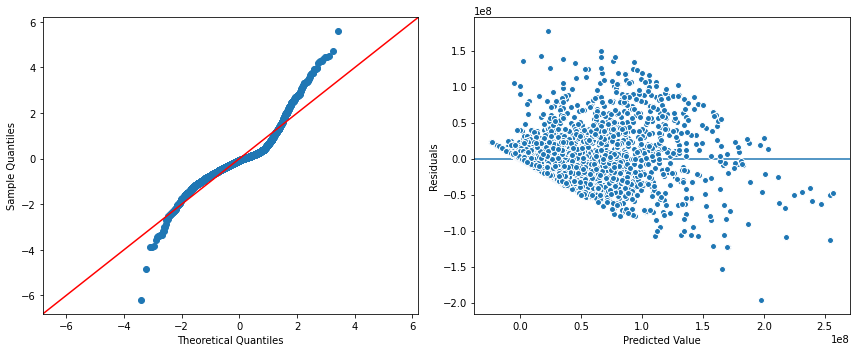

In [99]:
## Use our function to make new x,y vars
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df_clean_iqr)

## instantiate an OLS model WITH the training data.
model = sm.OLS(y_train, X_train_df)

## Fit the model and view the summary
result = model.fit()
evaluate_ols(result, X_train_df, y_train)

# Addressing Multicollinearity

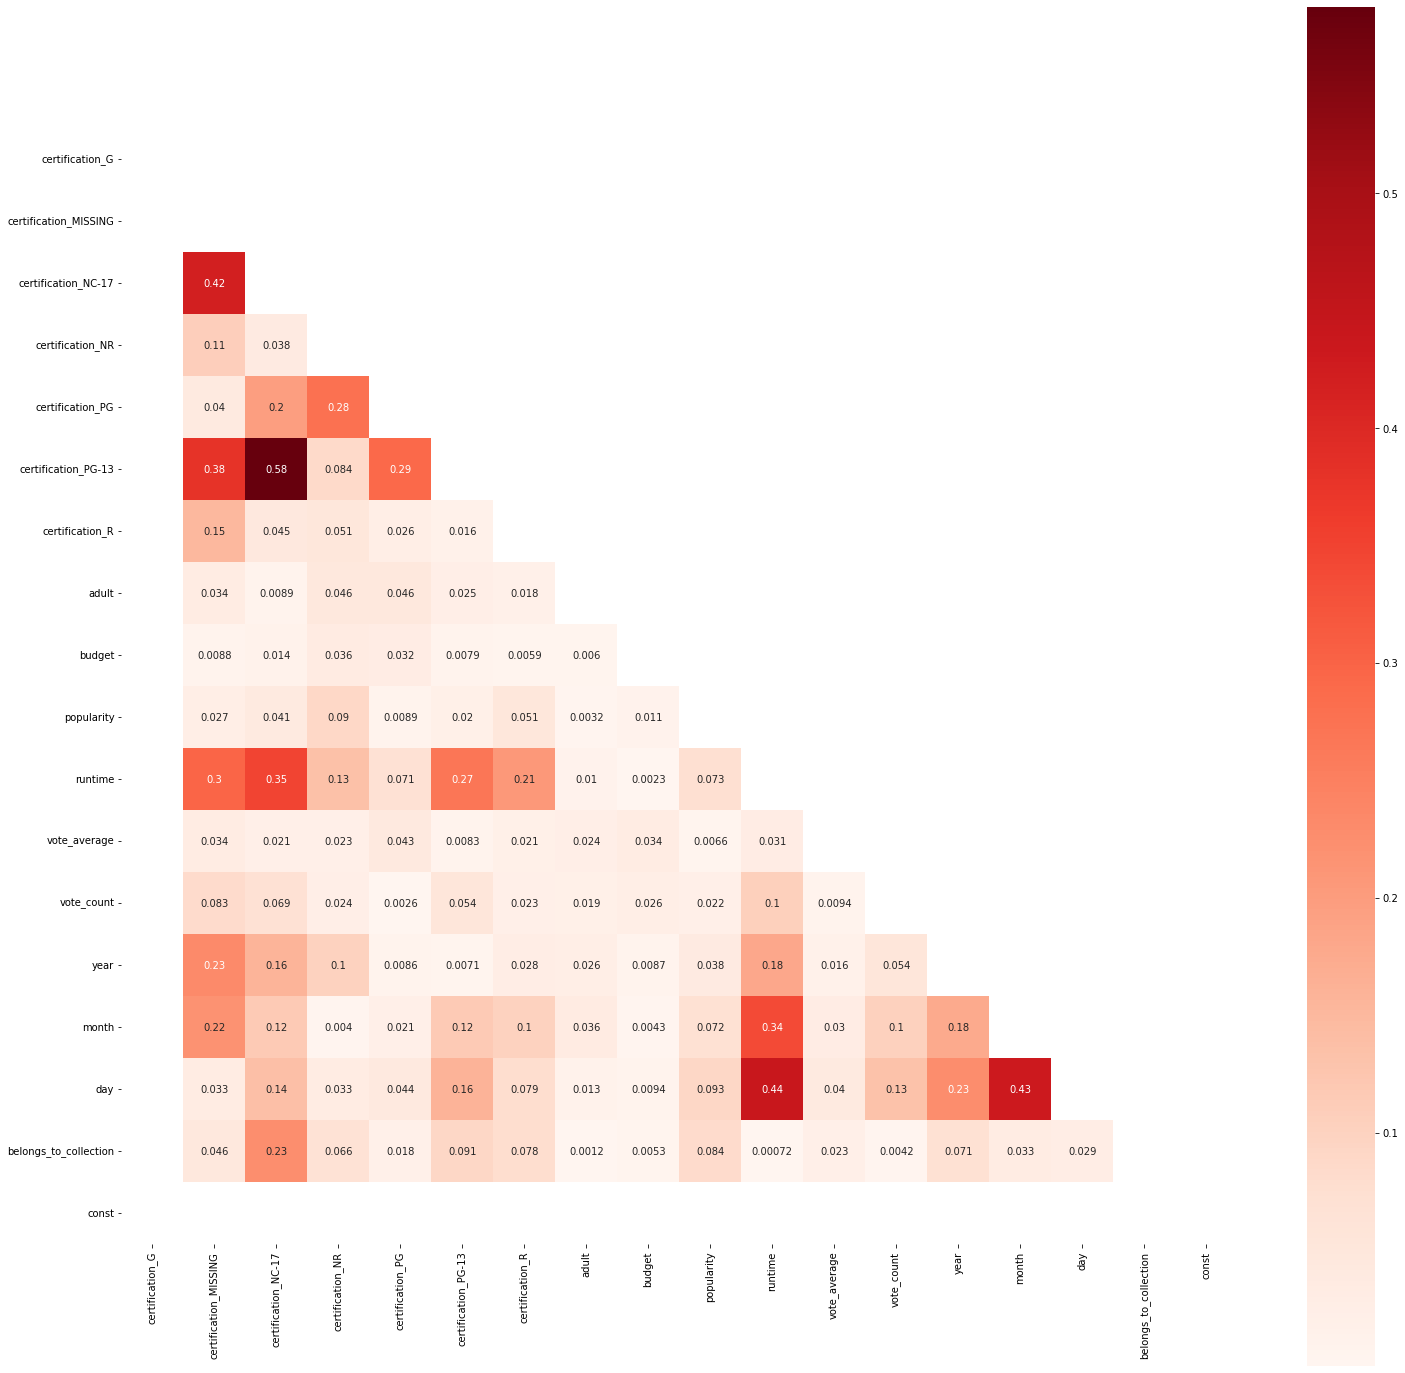

In [100]:
## Calculating the mask to hide the upper-right of the triangle
corr = X_train_df.corr().abs()

mask = np.triu(np.ones_like(corr))

plt.figure(figsize=(25,25))
sns.heatmap(corr,square=True, cmap='Reds', annot=True, mask=mask);

### Variance Inflation Factor

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
 
# separate just x-data and subtract mean
features = X_train_df -  X_train_df.mean()

features

certification_G  certification_MISSING  certification_NC-17  \
2711               0.0          -2.148071e+07             -12.7436   
30894              0.0          -2.069582e+07             -12.9246   
53000              0.0          -4.054186e+06              -3.1646   
45548              0.0           3.544581e+07              -0.9876   
10864              0.0           8.445814e+06              26.6964   
...                ...                    ...                  ...   
4393               0.0          -1.741273e+07              -9.8286   
46780              0.0           5.844581e+07               7.7044   
23477              0.0           3.445814e+06              -0.3516   
53917              0.0           8.445814e+06              11.0364   
53278              0.0           2.944581e+07              -1.7246   

       certification_NR  certification_PG  certification_PG-13  \
2711         -15.407063         -0.617219         -1072.056364   
30894         21.592937          3.782781         -1083.056364   
53000          1.592937         -0.217219          -672.056364   
45548         14.592937         -0.317219            67.943636   
10864          6.592937          0.382781          -207.056364   
...                 ...               ...                  ...   
4393         -21.407063         -0.817219          -808.056364   
46780        -12.407063         -0.017219           724.943636   
23477         16.592937         -0.417219          -549.056364   
53917          4.592937          0.182781          1100.943636   
53278        -15.407063         -0.717219          -600.056364   

       certification_R     adult     budget  popularity   runtime  \
2711          0.658098  3.257046  -1.144317   -0.015175 -0.257975   
30894         7.658098  1.257046   6.855683   -0.015175  0.742025   
53000        -4.341902  1.257046   9.855683   -0.015175 -0.257975   
45548        -9.341902 -3.742954 -14.144317   -0.015175 -0.257975   
10864         2.658098  2.257046  -8.144317   -0.015175  0.742025   
...                ...       ...        ...         ...       ...   
4393          0.658098 -0.742954  -2.144317   -0.015175  0.742025   
46780        -8.341902 -3.742954 -11.144317   -0.015175 -0.257975   
23477         6.658098  5.257046   5.855683   -0.015175 -0.257975   
53917        -3.341902  3.257046   1.855683   -0.015175 -0.257975   
53278        -4.341902  4.257046   6.855683   -0.015175 -0.257975   

       vote_average  vote_count      year     month       day  \
2711      -0.002787    -0.03066 -0.085785 -0.249303  0.641685   
30894     -0.002787    -0.03066 -0.085785 -0.249303 -0.358315   
53000     -0.002787    -0.03066 -0.085785 -0.249303  0.641685   
45548     -0.002787    -0.03066 -0.085785 -0.249303  0.641685   
10864     -0.002787    -0.03066 -0.085785 -0.249303 -0.358315   
...             ...         ...       ...       ...       ...   
4393      -0.002787    -0.03066 -0.085785 -0.249303 -0.358315   
46780     -0.002787    -0.03066 -0.085785  0.750697 -0.358315   
23477     -0.002787    -0.03066 -0.085785 -0.249303  0.641685   
53917     -0.002787    -0.03066 -0.085785 -0.249303  0.641685   
53278     -0.002787    -0.03066  0.914215 -0.249303 -0.358315   

       belongs_to_collection  const  
2711               -0.160111    0.0  
30894              -0.160111    0.0  
53000              -0.160111    0.0  
45548              -0.160111    0.0  
10864               0.839889    0.0  
...                      ...    ...  
4393               -0.160111    0.0  
46780              -0.160111    0.0  
23477              -0.160111    0.0  
53917               0.839889    0.0  
53278              -0.160111    0.0  

[3229 rows x 18 columns]

In [102]:
# create a list of VIF scores for each feature in features.
vif_scores = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

# create a new dataframe to hold the VIF scores 
VIF = pd.Series(vif_scores, index=features.columns)
VIF


/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


certification_G               NaN
certification_MISSING    1.509348
certification_NC-17      1.883602
certification_NR         1.187052
certification_PG         1.218082
certification_PG-13      1.709863
certification_R          1.112794
adult                    1.009394
budget                   1.004003
popularity                    inf
runtime                       inf
vote_average                  inf
vote_count                    inf
year                          inf
month                         inf
day                           inf
belongs_to_collection    1.097387
const                         NaN
dtype: float64

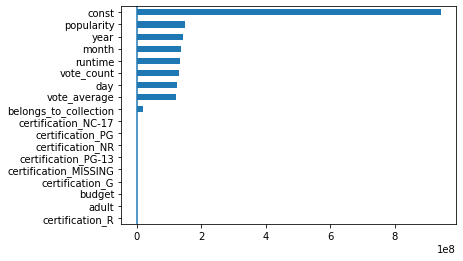

In [103]:
## Visualize Coefficients
ax = result.params.sort_values().plot(kind='barh')
ax.axvline()

## Compare to Alternative Regressors

In [ ]:
from sklearn.ensemble import RandomForestRegressor
X_train_df, y_train, X_test_df, y_test = get_train_test_split(df)

reg = RandomForestRegressor(verbose=1,random_state=42)
reg.fit(X_train_df, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
## Get train data performance from skearn to confirm matches OLS
y_hat_train = reg.predict(X_train_df)
print(f'Training R^2: {r2_score(y_train, y_hat_train):.3f}')

## Get test data performance
y_hat_test = reg.predict(X_test_df)
print(f'Testing R^2: {r2_score(y_test, y_hat_test):.3f}')

In [ ]:
evaluate_ols(reg, X_train_df, y_train)

In [ ]:
importances = pd.Series(reg.feature_importances_, index=X_train_df.columns)
importances.sort_values().tail(25).plot(kind='barh',figsize=(6,10))